# Read

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from calendar import month_name

In [ ]:
returns = pd.read_excel('global_sales_sample_dataset.xlsx', sheet_name='Returns')
returns.columns = [column.lower().replace(' ', '_') for column in returns.columns]
returns.head()

returned                order_id         region
0      Yes  IN-2017-CA120551-42816  Southern Asia
1      Yes  IN-2017-AA103751-42926  Southern Asia
2      Yes  IN-2017-TS212051-42904  Southern Asia
3      Yes   AG-2014-RO97803-41695   North Africa
4      Yes   AG-2015-LC70503-42265   North Africa

In [ ]:
orders = pd.read_excel('global_sales_sample_dataset.xlsx', sheet_name='Orders')
# Переименуем все столбцы для удобства в snake_case.
orders.columns = [column.lower().replace(' ', '_') for column in orders.columns]

orders.head()

row_id                order_id order_date  ship_date       ship_mode  \
0   24599  IN-2017-CA120551-42816 2017-03-22 2017-03-29  Standard Class   
1   29465  ID-2015-BD116051-42248 2015-09-01 2015-09-04    Second Class   
2   24598  IN-2017-CA120551-42816 2017-03-22 2017-03-29  Standard Class   
3   24597  IN-2017-CA120551-42816 2017-03-22 2017-03-29  Standard Class   
4   29464  ID-2015-BD116051-42248 2015-09-01 2015-09-04    Second Class   

  customer_id    customer_name      segment  postal_code   city  ...  \
0   CA-120551  Cathy Armstrong  Home Office          NaN  Herat  ...   
1   BD-116051     Brian Dahlen     Consumer          NaN  Herat  ...   
2   CA-120551  Cathy Armstrong  Home Office          NaN  Herat  ...   
3   CA-120551  Cathy Armstrong  Home Office          NaN  Herat  ...   
4   BD-116051     Brian Dahlen     Consumer          NaN  Herat  ...   

    product_id                                       product_name  \
0  FUR-BO-4861                    Ikea Library with Doors, Mobile   
1  OFF-SU-2988                           Acme Scissors, Easy Grip   
2  TEC-MA-4211                       Epson Receipt Printer, White   
3  FUR-FU-5726                    Rubbermaid Door Stop, Erganomic   
4  OFF-EN-3664  Cameo Interoffice Envelope, with clear poly wi...   

  sub-category         category   sales quantity discount  profit  \
0    Bookcases        Furniture  731.82        2      0.0  102.42   
1     Supplies  Office Supplies  243.54        9      0.0  104.49   
2     Machines       Technology  346.32        3      0.0   13.77   
3  Furnishings        Furniture  169.68        4      0.0   79.68   
4    Envelopes  Office Supplies  203.88        4      0.0   24.36   

   shipping_cost  order_priority  
0          39.66          Medium  
1          18.72          Medium  
2          14.10          Medium  
3          11.01          Medium  
4           5.72          Medium  

[5 rows x 24 columns]

In [ ]:
data = pd.merge(orders, returns[['order_id', 'returned']], how='left', on='order_id')
data['returned'] = data['returned'].apply(lambda x: 1 if x == 'Yes' else 0)

# Преобразуем столбцы с датой в дату
date_columns = pd.Series(data.columns)
date_columns = list(date_columns[date_columns.apply(lambda x: 'date' in x)])
print(f'{date_columns=}')
for column in date_columns:
    data[column] = pd.to_datetime(data[column])

# Добавим данные о месяце и годе
data['year'] = data['order_date'].dt.year
data['month'] = data['order_date'].dt.month
data['month_name'] = data['month'].apply(lambda x: month_name[x])
data['month_trunc'] = data['order_date'].dt.to_period('M').dt.to_timestamp()

drop_columns = [
    'row_id', 'order_id', 'customer_id', 'postal_code', 'product_id'
]
data = data.drop(columns=drop_columns)
print(f'{data.columns=}')

data.head()

date_columns=['order_date', 'ship_date']
data.columns=Index(['order_date', 'ship_date', 'ship_mode', 'customer_name', 'segment',
       'city', 'state', 'country', 'region', 'market', 'product_name',
       'sub-category', 'category', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority', 'returned', 'year', 'month',
       'month_name', 'month_trunc'],
      dtype='object')


order_date  ship_date       ship_mode    customer_name      segment   city  \
0 2017-03-22 2017-03-29  Standard Class  Cathy Armstrong  Home Office  Herat   
1 2015-09-01 2015-09-04    Second Class     Brian Dahlen     Consumer  Herat   
2 2017-03-22 2017-03-29  Standard Class  Cathy Armstrong  Home Office  Herat   
3 2017-03-22 2017-03-29  Standard Class  Cathy Armstrong  Home Office  Herat   
4 2015-09-01 2015-09-04    Second Class     Brian Dahlen     Consumer  Herat   

   state      country         region        market  ... quantity discount  \
0  Hirat  Afghanistan  Southern Asia  Asia Pacific  ...        2      0.0   
1  Hirat  Afghanistan  Southern Asia  Asia Pacific  ...        9      0.0   
2  Hirat  Afghanistan  Southern Asia  Asia Pacific  ...        3      0.0   
3  Hirat  Afghanistan  Southern Asia  Asia Pacific  ...        4      0.0   
4  Hirat  Afghanistan  Southern Asia  Asia Pacific  ...        4      0.0   

   profit  shipping_cost  order_priority  returned  year  month month_name  \
0  102.42          39.66          Medium         1  2017      3      March   
1  104.49          18.72          Medium         0  2015      9  September   
2   13.77          14.10          Medium         1  2017      3      March   
3   79.68          11.01          Medium         1  2017      3      March   
4   24.36           5.72          Medium         0  2015      9  September   

   month_trunc  
0   2017-03-01  
1   2015-09-01  
2   2017-03-01  
3   2017-03-01  
4   2015-09-01  

[5 rows x 24 columns]

In [ ]:
info = data.groupby(
    ['year', 'month', 'month_trunc', 'sub-category'],
    as_index=False
)['quantity'].sum().sort_values('month_trunc').reset_index(drop=True)

info

year  month month_trunc sub-category  quantity
0    2014      1  2014-01-01  Accessories        50
1    2014      1  2014-01-01       Tables        22
2    2014      1  2014-01-01     Supplies        68
3    2014      1  2014-01-01      Storage       167
4    2014      1  2014-01-01       Phones        73
..    ...    ...         ...          ...       ...
811  2017     12  2017-12-01   Appliances       322
812  2017     12  2017-12-01  Accessories       468
813  2017     12  2017-12-01     Supplies       410
814  2017     12  2017-12-01    Envelopes       343
815  2017     12  2017-12-01       Tables       142

[816 rows x 5 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first')
info_ohe = pd.DataFrame(ohe.fit_transform(info[['sub-category']]), columns=map(lambda x: x.lower(), ohe.categories_[0][1::]))
info_ohe = pd.DataFrame(np.hstack((info, info_ohe)), columns=list(info.columns)+list(info_ohe.columns))
info_ohe.sort_values('month_trunc', inplace=True)
info_ohe.drop(columns=['month_trunc', 'sub-category'], inplace=True)
info_ohe

year month quantity appliances  art binders bookcases chairs copiers  \
0    2014     1       50        0.0  0.0     0.0       0.0    0.0     0.0   
16   2014     1       74        0.0  0.0     0.0       0.0    0.0     0.0   
15   2014     1       35        1.0  0.0     0.0       0.0    0.0     0.0   
14   2014     1      201        0.0  1.0     0.0       0.0    0.0     0.0   
13   2014     1      174        0.0  0.0     1.0       0.0    0.0     0.0   
..    ...   ...      ...        ...  ...     ...       ...    ...     ...   
800  2017    12      469        0.0  0.0     0.0       0.0    0.0     0.0   
799  2017    12      624        0.0  0.0     0.0       0.0    0.0     0.0   
814  2017    12      343        0.0  0.0     0.0       0.0    0.0     0.0   
806  2017    12      320        0.0  0.0     0.0       1.0    0.0     0.0   
815  2017    12      142        0.0  0.0     0.0       0.0    0.0     0.0   

    envelopes fasteners furnishings labels machines paper phones storage  \
0         0.0       0.0         0.0    0.0      0.0   0.0    0.0     0.0   
16        0.0       1.0         0.0    0.0      0.0   0.0    0.0     0.0   
15        0.0       0.0         0.0    0.0      0.0   0.0    0.0     0.0   
14        0.0       0.0         0.0    0.0      0.0   0.0    0.0     0.0   
13        0.0       0.0         0.0    0.0      0.0   0.0    0.0     0.0   
..        ...       ...         ...    ...      ...   ...    ...     ...   
800       0.0       0.0         0.0    0.0      0.0   0.0    1.0     0.0   
799       0.0       0.0         0.0    0.0      0.0   0.0    0.0     1.0   
814       1.0       0.0         0.0    0.0      0.0   0.0    0.0     0.0   
806       0.0       0.0         0.0    0.0      0.0   0.0    0.0     0.0   
815       0.0       0.0         0.0    0.0      0.0   0.0    0.0     0.0   

    supplies tables  
0        0.0    0.0  
16       0.0    0.0  
15       0.0    0.0  
14       0.0    0.0  
13       0.0    0.0  
..       ...    ...  
800      0.0    0.0  
799      0.0    0.0  
814      0.0    0.0  
806      0.0    0.0  
815      0.0    1.0  

[816 rows x 19 columns]

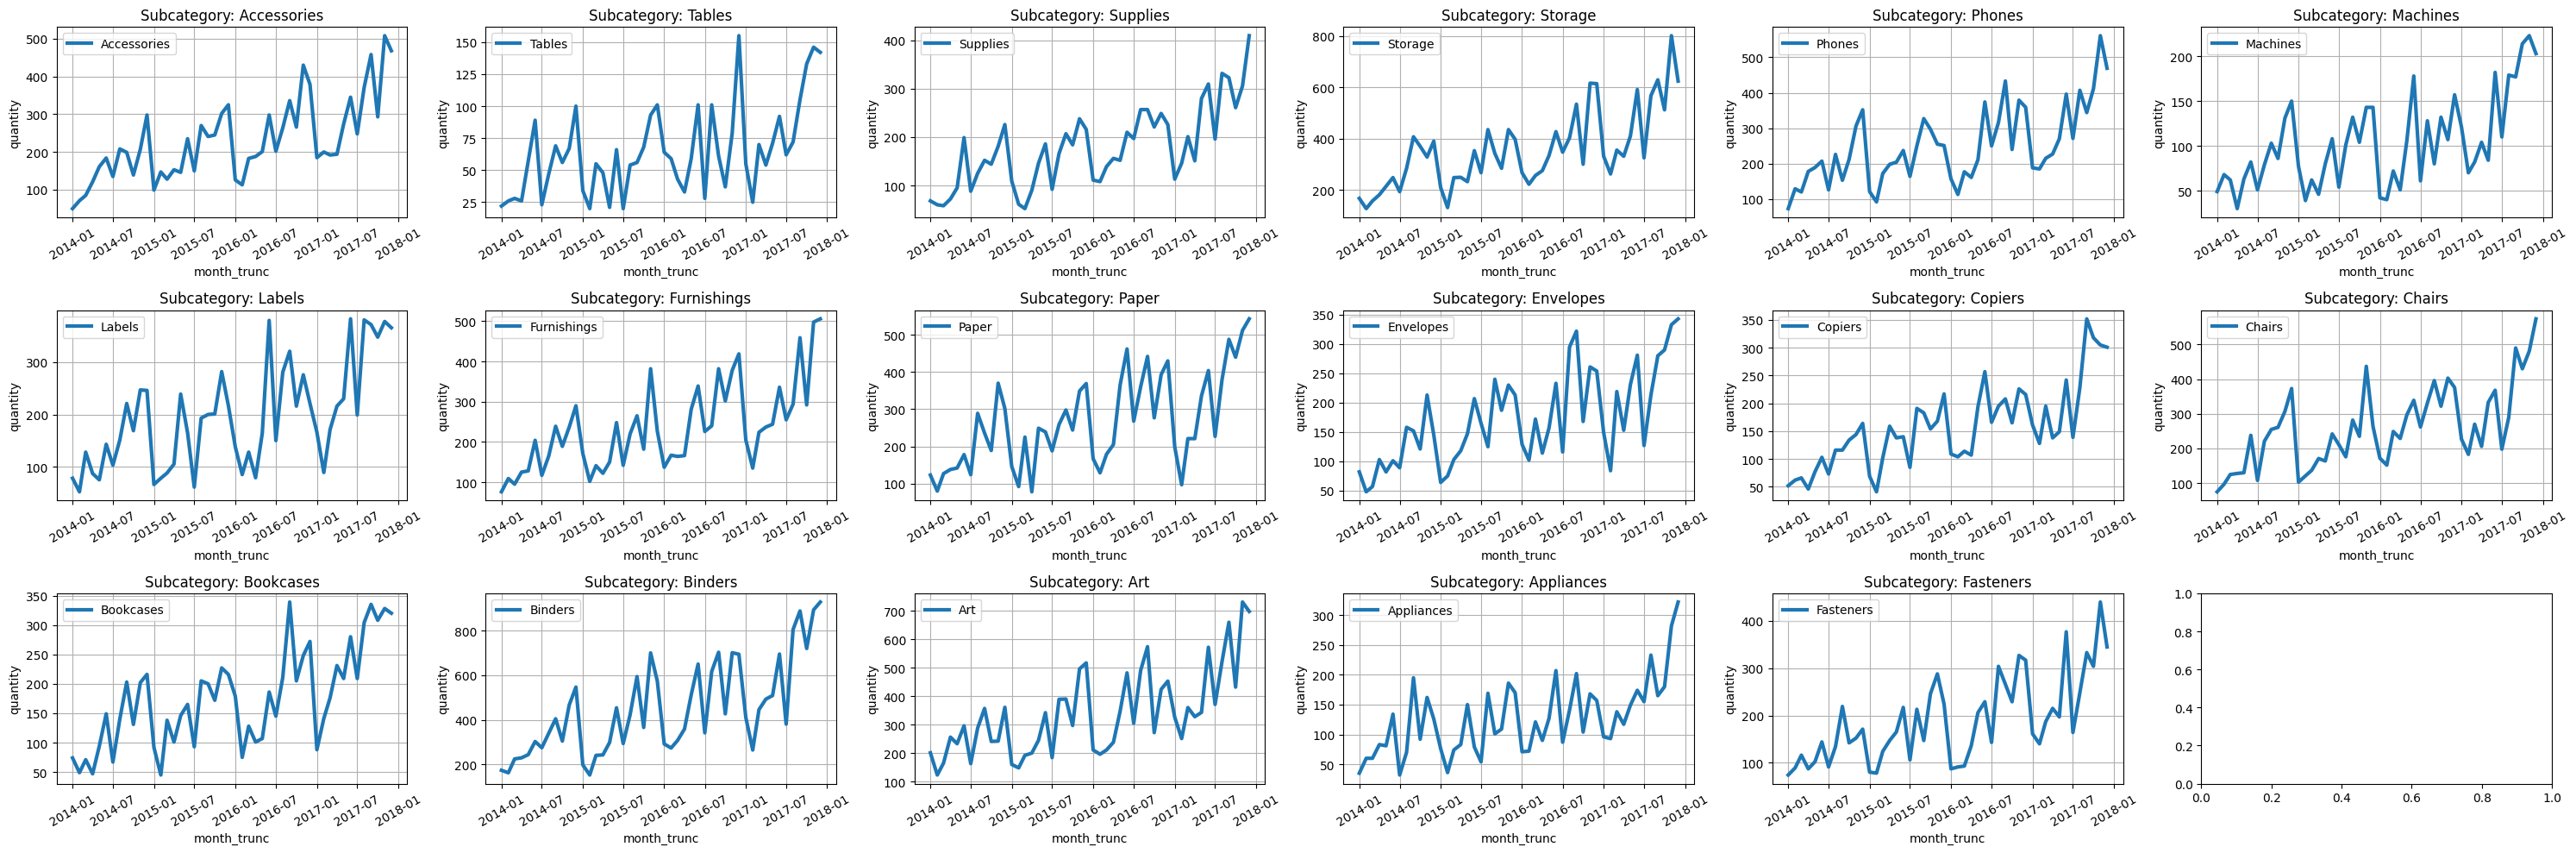

In [ ]:
cats = info['sub-category'].unique()
fig, axes = plt.subplots(len(cats) // 6 + (len(cats) % 6 != 0) , 6, figsize=(30, 10))

for subcategory, ax in zip(cats, axes.flatten()):
    sns.lineplot(
        data=info[info['sub-category'] == subcategory],
        x='month_trunc',
        y='quantity',
        ax=ax,
        linewidth=3,
        label=subcategory
    )
    for label in ax.get_xticklabels():
        label.set_rotation(30)
    ax.set_title(f'Subcategory: {subcategory}')
    ax.grid()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

index_75_percent = len(info_ohe) * 3 // 4
X, y = info_ohe.drop(columns='quantity'), info_ohe['quantity']

scaler = StandardScaler()
columns = X.columns
X_train = pd.DataFrame(scaler.fit_transform(X.iloc[:index_75_percent]), columns=columns)
X_test = pd.DataFrame(scaler.transform(X.iloc[index_75_percent:]), columns=columns)
y_train, y_test = y.iloc[:index_75_percent], y.iloc[index_75_percent:]

display(X_train.head())
display(y_train.head())

year     month  appliances   art  binders  bookcases  chairs  copiers  \
0 -1.224745 -1.593255       -0.25 -0.25    -0.25      -0.25   -0.25    -0.25   
1 -1.224745 -1.593255       -0.25 -0.25    -0.25      -0.25   -0.25    -0.25   
2 -1.224745 -1.593255        4.00 -0.25    -0.25      -0.25   -0.25    -0.25   
3 -1.224745 -1.593255       -0.25  4.00    -0.25      -0.25   -0.25    -0.25   
4 -1.224745 -1.593255       -0.25 -0.25     4.00      -0.25   -0.25    -0.25   

   envelopes  fasteners  furnishings  labels  machines  paper  phones  \
0      -0.25      -0.25        -0.25   -0.25     -0.25  -0.25   -0.25   
1      -0.25       4.00        -0.25   -0.25     -0.25  -0.25   -0.25   
2      -0.25      -0.25        -0.25   -0.25     -0.25  -0.25   -0.25   
3      -0.25      -0.25        -0.25   -0.25     -0.25  -0.25   -0.25   
4      -0.25      -0.25        -0.25   -0.25     -0.25  -0.25   -0.25   

   storage  supplies  tables  
0    -0.25     -0.25   -0.25  
1    -0.25     -0.25   -0.25  
2    -0.25     -0.25   -0.25  
3    -0.25     -0.25   -0.25  
4    -0.25     -0.25   -0.25

0      50
16     74
15     35
14    201
13    174
Name: quantity, dtype: object

In [ ]:
X_train_lag, X_test_lag = X_train.copy(), X_test.copy()

for lag in range(1, 6):
    X_train_lag[f'quantity_prev_{lag}'] = y_train.shift(lag, fill_value=0)
    X_test_lag[f'quantity_prev_{lag}'] = y_test.shift(lag, fill_value=0).reset_index(drop=True)

X_test_lag

year     month  appliances   art  binders  bookcases  chairs  copiers  \
0    2.44949 -1.593255       -0.25 -0.25    -0.25      -0.25   -0.25    -0.25   
1    2.44949 -1.593255        4.00 -0.25    -0.25      -0.25   -0.25    -0.25   
2    2.44949 -1.593255       -0.25  4.00    -0.25      -0.25   -0.25    -0.25   
3    2.44949 -1.593255       -0.25 -0.25     4.00      -0.25   -0.25    -0.25   
4    2.44949 -1.593255       -0.25 -0.25    -0.25       4.00   -0.25    -0.25   
..       ...       ...         ...   ...      ...        ...     ...      ...   
199  2.44949  1.593255       -0.25 -0.25    -0.25      -0.25   -0.25    -0.25   
200  2.44949  1.593255       -0.25 -0.25    -0.25      -0.25   -0.25    -0.25   
201  2.44949  1.593255       -0.25 -0.25    -0.25      -0.25   -0.25    -0.25   
202  2.44949  1.593255       -0.25 -0.25    -0.25       4.00   -0.25    -0.25   
203  2.44949  1.593255       -0.25 -0.25    -0.25      -0.25   -0.25    -0.25   

     envelopes  fasteners  ...  paper  phones  storage  supplies  tables  \
0        -0.25      -0.25  ...  -0.25   -0.25    -0.25     -0.25   -0.25   
1        -0.25      -0.25  ...  -0.25   -0.25    -0.25     -0.25   -0.25   
2        -0.25      -0.25  ...  -0.25   -0.25    -0.25     -0.25   -0.25   
3        -0.25      -0.25  ...  -0.25   -0.25    -0.25     -0.25   -0.25   
4        -0.25      -0.25  ...  -0.25   -0.25    -0.25     -0.25   -0.25   
..         ...        ...  ...    ...     ...      ...       ...     ...   
199      -0.25      -0.25  ...  -0.25    4.00    -0.25     -0.25   -0.25   
200      -0.25      -0.25  ...  -0.25   -0.25     4.00     -0.25   -0.25   
201       4.00      -0.25  ...  -0.25   -0.25    -0.25     -0.25   -0.25   
202      -0.25      -0.25  ...  -0.25   -0.25    -0.25     -0.25   -0.25   
203      -0.25      -0.25  ...  -0.25   -0.25    -0.25     -0.25    4.00   

     quantity_prev_1  quantity_prev_2  quantity_prev_3 quantity_prev_4  \
0                  0                0                0               0   
1                185                0                0               0   
2                 96              185                0               0   
3                326               96              185               0   
4                411              326               96             185   
..               ...              ...              ...             ...   
199              543              203              506             345   
200              469              543              203             506   
201              624              469              543             203   
202              343              624              469             543   
203              320              343              624             469   

    quantity_prev_5  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
..              ...  
199             366  
200             345  
201             506  
202             203  
203             543  

[204 rows x 23 columns]

# Models

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import root_mean_squared_error as RMSE

def display_preds(train_preds, test_preds, model_title):
    preds = list(train_preds) + list(test_preds)
    data_copy = info.copy()
    data_copy['predicted'] = preds
    data_copy['is_train'] = [1] * len(train_preds) + [0] * len(test_preds)

    fig, axes = plt.subplots(len(cats) // 6 + (len(cats) % 6 != 0) , 6, figsize=(30, 10))
    for subcategory, ax in zip(cats, axes.flatten()):
        sns.lineplot(
            data=data_copy[data_copy['sub-category'] == subcategory],
            x='month_trunc',
            y='quantity',
            ax=ax,
            label='True value',
            color='blue',
            linewidth=3
        )
        sns.lineplot(
            data=data_copy[(data_copy['sub-category'] == subcategory) & (data_copy['is_train'] == 1)],
            x='month_trunc',
            y='predicted',
            ax=ax,
            label='Train prediction',
            color='orange'
        )
        sns.lineplot(
            data=data_copy[(data_copy['sub-category'] == subcategory) & (data_copy['is_train'] == 0)],
            x='month_trunc',
            y='predicted',
            ax=ax,
            label='Test prediction',
            color='red'
        )
        for label in ax.get_xticklabels():
            label.set_rotation(30)
            ax.set_title(f'Subcategory: {subcategory}')
        ax.grid()
        ax.legend()

    train, test = data_copy[data_copy['is_train'] == 1], data_copy[data_copy['is_train'] == 0]
    for metric, metric_name in zip([MAE, MAPE, RMSE], ['MAE', 'MAPE', 'RMSE']):
        print(f'Overall train {metric_name}:', round(metric(train['quantity'], train['predicted']), 2))
        print(f'Overall test {metric_name}:', round(metric(test['quantity'], test['predicted']), 2))

    train_mae, test_mae, train_mape, test_mape, train_rmse, test_rmse = [[] for _ in range(6)]
    metric_lists = [(train_mae, test_mae), (train_mape, test_mape), (train_rmse, test_rmse)]
    for subcategory in cats:
        for metric, (train_list, test_list) in zip([MAE, MAPE, RMSE], metric_lists):
            train_list.append(metric(train[train['sub-category'] == subcategory]['quantity'],
                                    train[train['sub-category'] == subcategory]['predicted']))
            test_list.append(metric(test[test['sub-category'] == subcategory]['quantity'],
                                    test[test['sub-category'] == subcategory]['predicted']))

    plt.suptitle(model_title, weight='bold', fontsize=20)
    plt.tight_layout()
    plt.show()

    return pd.DataFrame({
        'train_mae': train_mae,
        'train_mape': train_mape,
        'train_rmse': train_rmse,
        'test_mae': test_mae,
        'test_mape': test_mape,
        'test_rmse': test_rmse
    }, index=cats
    )

## Linear, Ridge and Lasso regressions

### With no lags

Overall train MAE: 92.12
Overall test MAE: 118.12
Overall train MAPE: 0.69
Overall test MAPE: 0.52
Overall train RMSE: 117.11
Overall test RMSE: 160.22


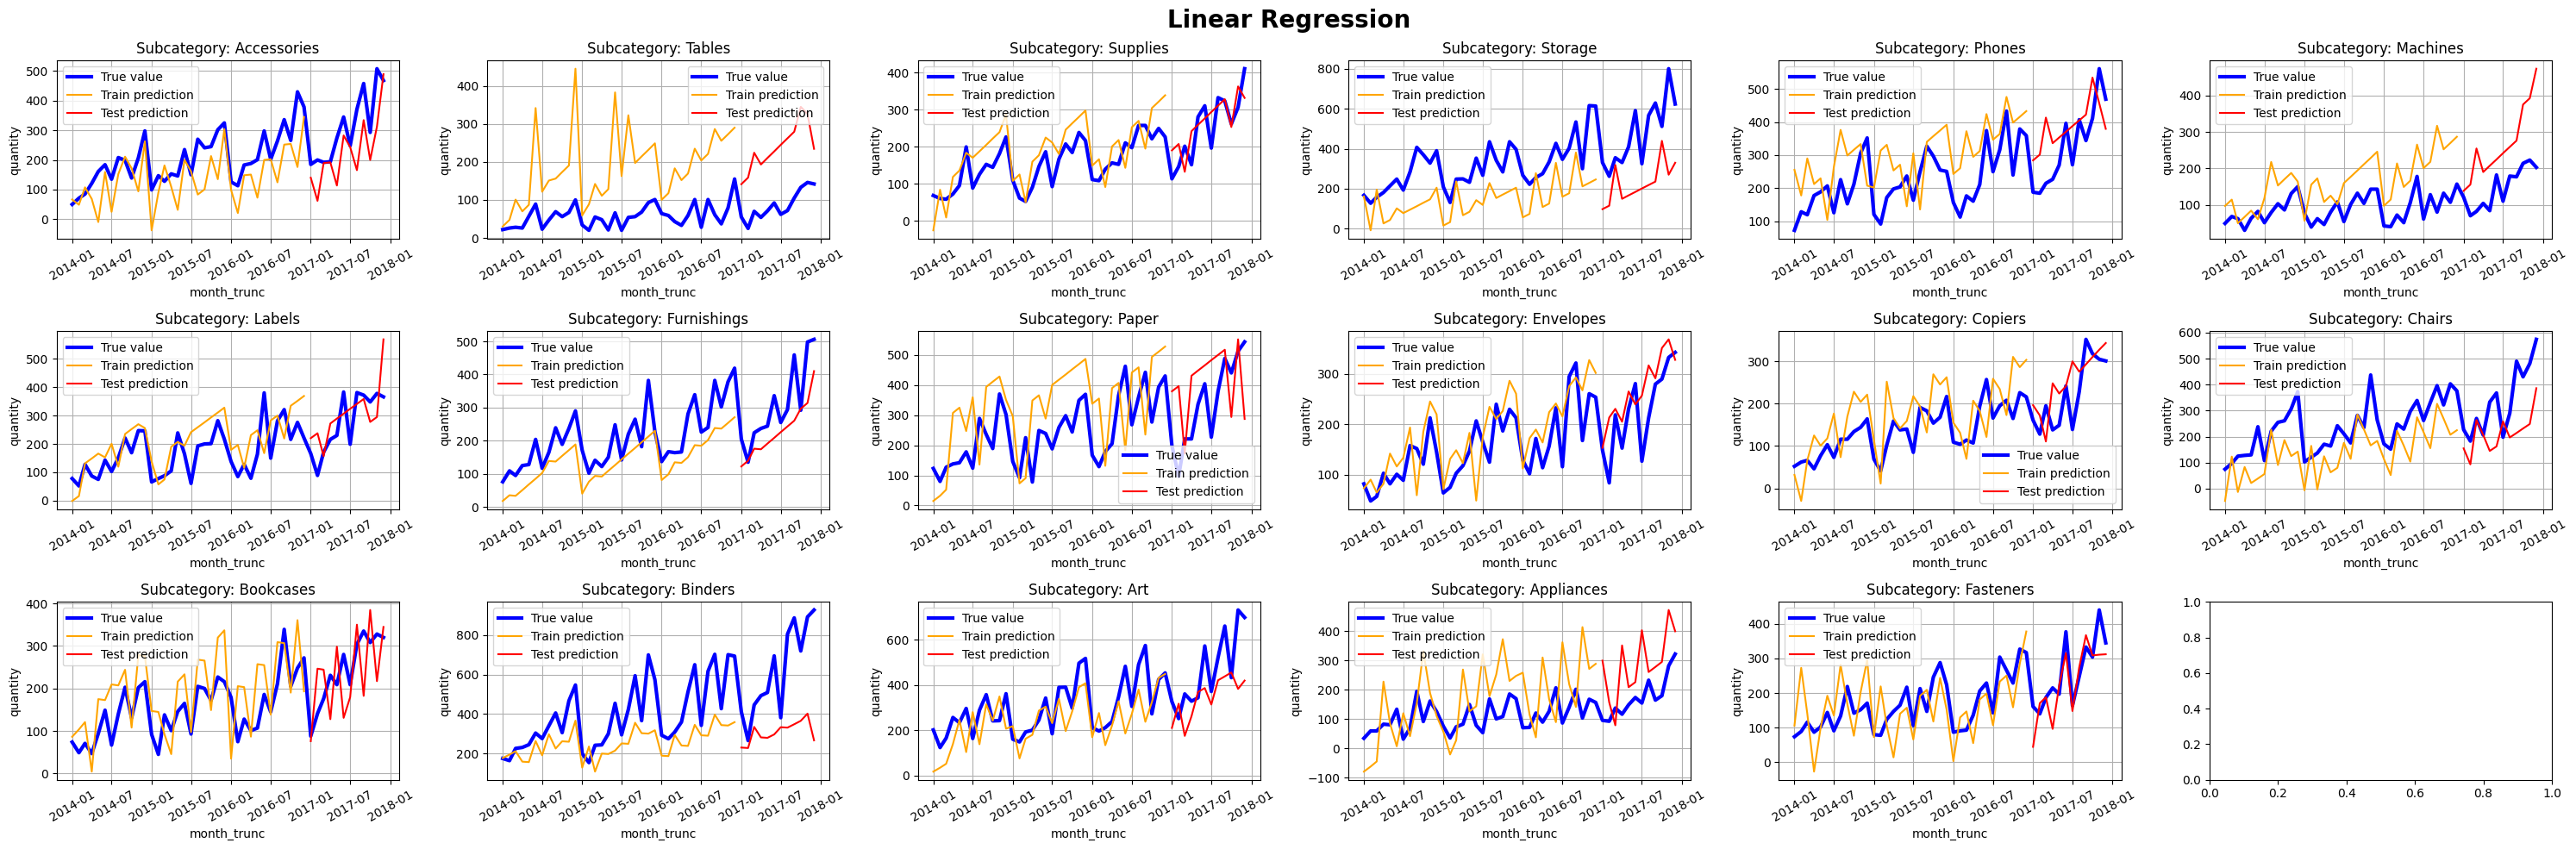

train_mae  train_mape  train_rmse    test_mae  test_mape  \
Accessories   72.422428    0.387971   94.197131   87.809923   0.276073   
Tables       128.523148    2.576816  151.063153  151.729303   2.155933   
Supplies      54.419877    0.430311   60.904854   51.604652   0.267310   
Storage      168.421523    0.552688  187.378829  251.159586   0.508415   
Phones       103.511904    0.625325  116.061200   95.237996   0.354753   
Machines      80.479751    1.074067   93.945533  120.183007   0.922414   
Labels        70.978535    0.566885   87.705500   78.628092   0.378502   
Furnishings   70.812192    0.346282   84.243405   78.459111   0.233939   
Paper        141.006702    0.738332  156.654730  146.353612   0.668471   
Envelopes     47.130239    0.354263   58.064812   52.689620   0.348700   
Copiers       59.612535    0.532587   72.996217   57.510271   0.339659   
Chairs        99.968390    0.479912  120.943797  134.186060   0.368146   
Bookcases     65.667247    0.566501   76.646475   80.573977   0.340617   
Binders      144.649253    0.330436  183.202016  311.969771   0.447740   
Art           87.295713    0.314872  116.817516  139.742073   0.279324   
Appliances   108.693265    1.305019  137.252100  120.457721   0.825575   
Fasteners     62.396861    0.471347   75.891138   49.736305   0.208477   

              test_rmse  
Accessories  113.833782  
Tables       156.079257  
Supplies      60.229484  
Storage      288.904205  
Phones       106.251114  
Machines     136.665422  
Labels        94.888906  
Furnishings   99.204996  
Paper        171.606138  
Envelopes     68.195742  
Copiers       71.932450  
Chairs       160.199403  
Bookcases     92.050379  
Binders      368.431402  
Art          171.938700  
Appliances   141.696981  
Fasteners     66.352043

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
display_preds(reg.predict(X_train), reg.predict(X_test), 'Linear Regression')

Overall train MAE: 92.04
Overall test MAE: 118.08
Overall train MAPE: 0.69
Overall test MAPE: 0.52
Overall train RMSE: 117.03
Overall test RMSE: 160.21


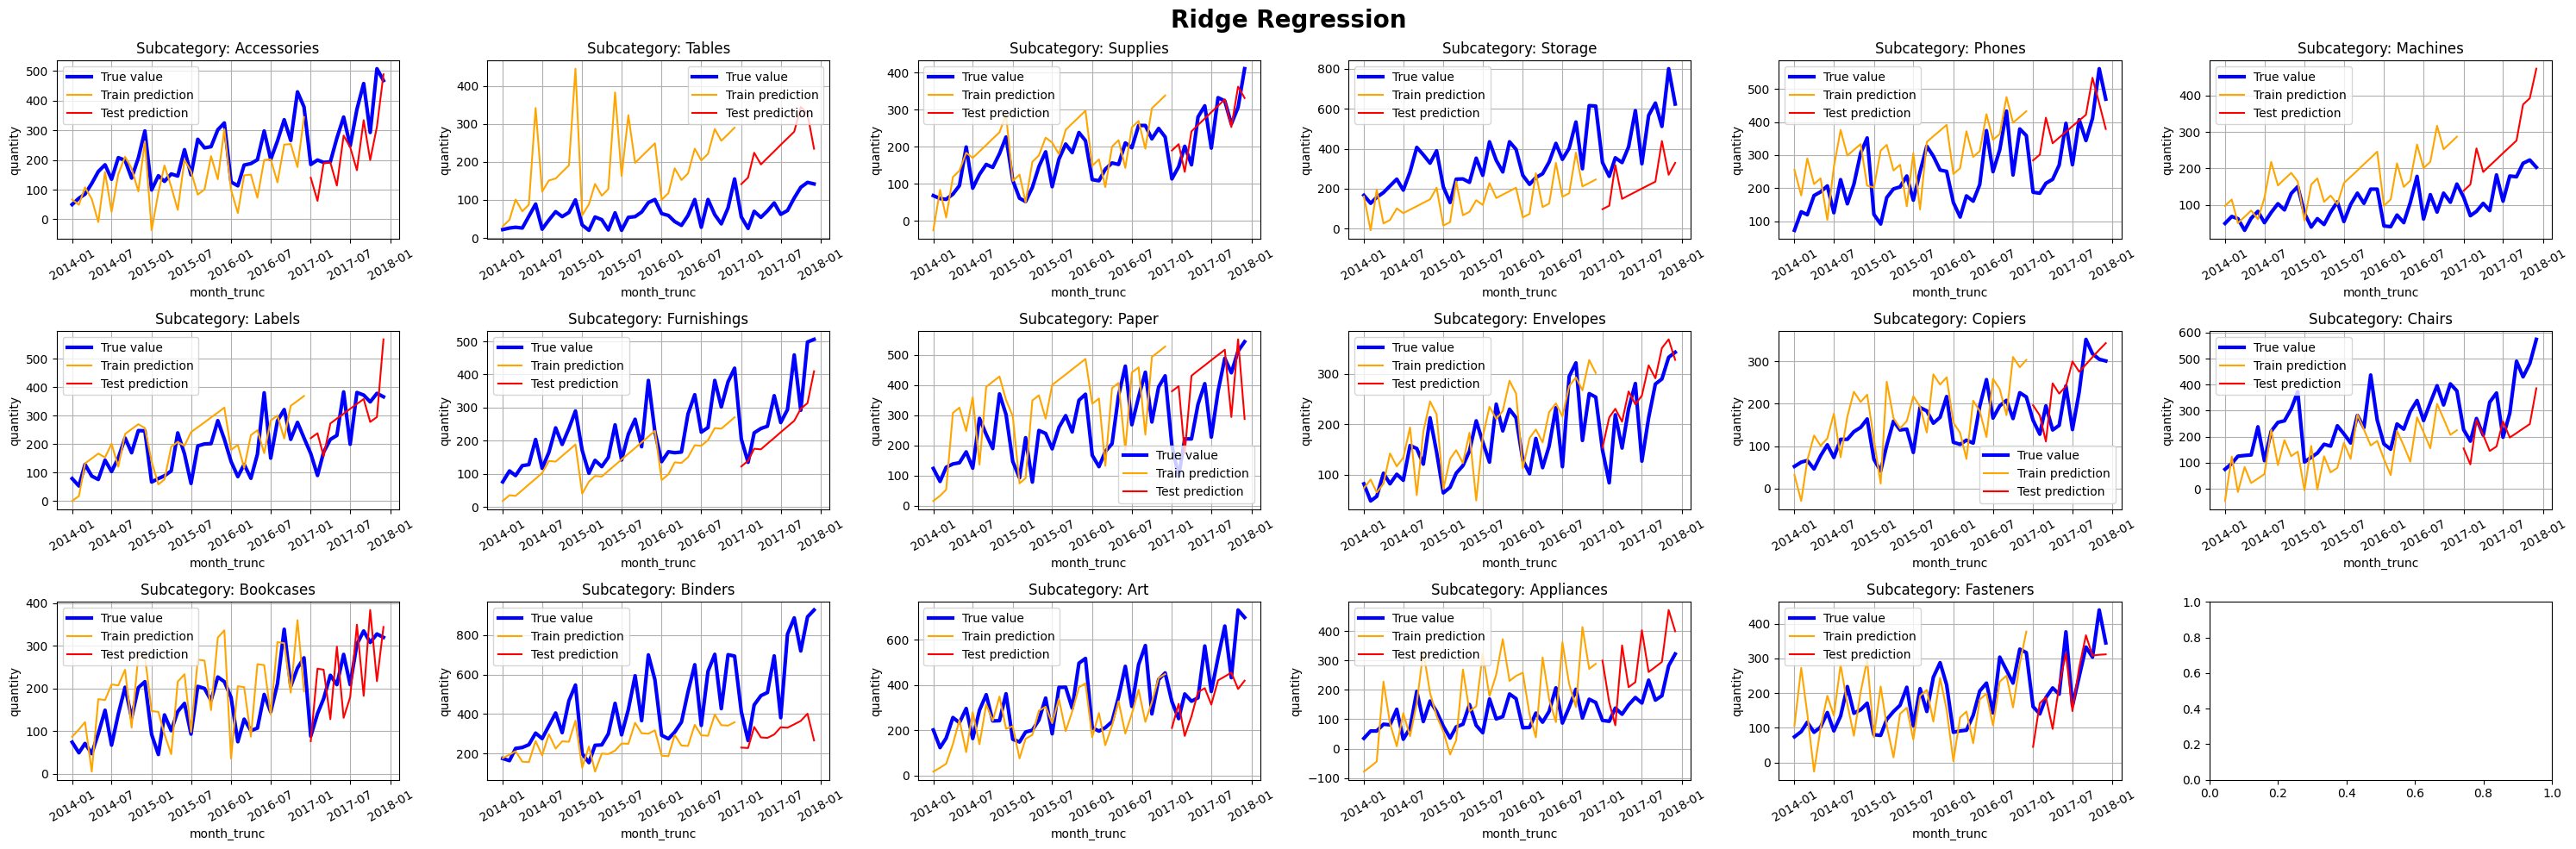

train_mae  train_mape  train_rmse    test_mae  test_mape  \
Accessories   72.346007    0.387372   94.093772   87.779768   0.275924   
Tables       128.517440    2.577920  150.982439  151.630667   2.155181   
Supplies      54.218558    0.428774   60.695185   51.543192   0.266790   
Storage      168.338094    0.552238  187.308687  251.205646   0.508459   
Phones       103.342109    0.624568  115.912765   95.178428   0.354343   
Machines      80.487935    1.074635   93.939348  120.077175   0.921901   
Labels        70.876445    0.566154   87.631308   78.607706   0.378305   
Furnishings   70.717976    0.345525   84.176664   78.499490   0.234015   
Paper        140.743869    0.737047  156.423596  146.069371   0.667386   
Envelopes     47.123729    0.354479   58.028309   52.625585   0.348419   
Copiers       59.572507    0.532198   72.937462   57.466793   0.339413   
Chairs        99.870682    0.479192  120.838566  134.193736   0.368072   
Bookcases     65.612346    0.566230   76.580297   80.451643   0.340018   
Binders      144.729692    0.330573  183.301390  312.139475   0.448019   
Art           87.278167    0.314633  116.790796  139.830034   0.279401   
Appliances   108.555344    1.303188  137.106680  120.289977   0.824645   
Fasteners     62.326993    0.470794   75.807736   49.697978   0.208238   

              test_rmse  
Accessories  113.832428  
Tables       155.959091  
Supplies      60.115760  
Storage      288.934720  
Phones       106.119856  
Machines     136.510793  
Labels        94.784076  
Furnishings   99.271091  
Paper        171.399338  
Envelopes     68.124020  
Copiers       71.867659  
Chairs       160.222715  
Bookcases     91.966414  
Binders      368.592135  
Art          172.110394  
Appliances   141.511538  
Fasteners     66.327089

In [ ]:
from sklearn.linear_model import Ridge

reg = Ridge(random_state=42).fit(X_train, y_train)
display_preds(reg.predict(X_train), reg.predict(X_test), 'Ridge Regression')

Overall train MAE: 90.15
Overall test MAE: 117.35
Overall train MAPE: 0.67
Overall test MAPE: 0.52
Overall train RMSE: 115.44
Overall test RMSE: 159.95


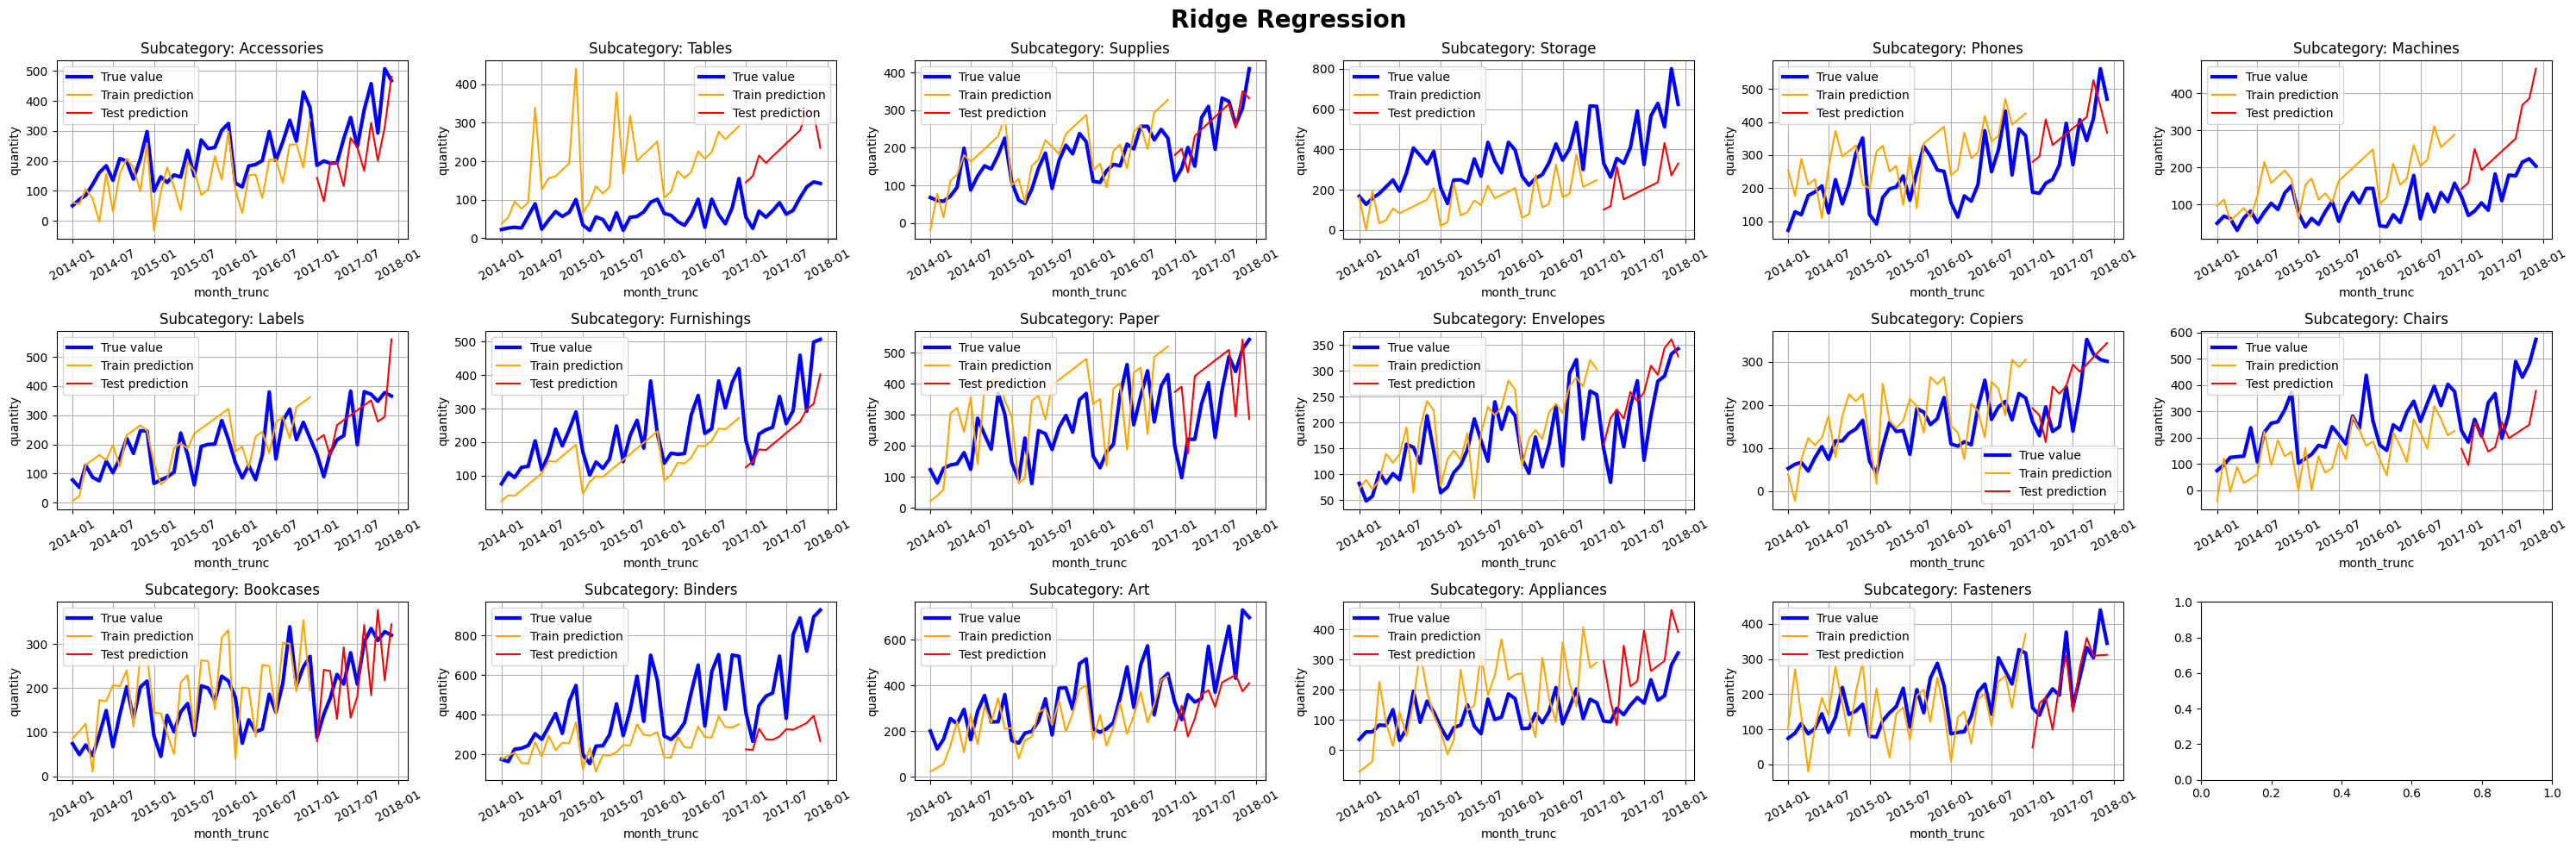

train_mae  train_mape  train_rmse    test_mae  test_mape  \
Accessories   70.377167    0.370286   91.921041   86.934590   0.271337   
Tables       129.959540    2.632121  150.949414  151.267260   2.163021   
Supplies      48.174728    0.382433   54.352600   49.913286   0.250024   
Storage      165.747480    0.540711  184.828909  250.929350   0.507306   
Phones        99.482916    0.606298  112.649382   93.967362   0.345014   
Machines      81.524583    1.092167   94.619176  119.078109   0.919979   
Labels        66.548745    0.532759   84.247681   77.014745   0.365331   
Furnishings   67.318376    0.323389   81.149568   78.134135   0.232063   
Paper        136.599232    0.715647  152.936824  141.400574   0.649611   
Envelopes     46.831856    0.355319   57.270126   49.968851   0.336279   
Copiers       58.799784    0.520352   71.279095   56.275666   0.331786   
Chairs        96.938167    0.460340  118.139664  134.579218   0.368554   
Bookcases     62.425279    0.539660   73.365490   77.193124   0.323555   
Binders      148.127343    0.338358  186.737239  317.749474   0.458481   
Art           86.801340    0.309808  115.380079  142.419561   0.283065   
Appliances   106.750536    1.278091  134.705468  118.248783   0.813368   
Fasteners     60.114359    0.456824   73.834819   49.834239   0.209031   

              test_rmse  
Accessories  113.836660  
Tables       155.193707  
Supplies      56.247922  
Storage      288.040182  
Phones       103.756992  
Machines     133.996408  
Labels        92.025861  
Furnishings   98.933651  
Paper        167.827157  
Envelopes     65.709972  
Copiers       69.889579  
Chairs       160.193382  
Bookcases     89.338552  
Binders      373.140824  
Art          176.168154  
Appliances   138.417514  
Fasteners     65.961385

In [ ]:
from sklearn.linear_model import Lasso

reg = Lasso(random_state=42).fit(X_train, y_train)
display_preds(reg.predict(X_train), reg.predict(X_test), 'Ridge Regression')

### With lags

Overall train MAE: 92.64
Overall test MAE: 119.45
Overall train MAPE: 0.68
Overall test MAPE: 0.52
Overall train RMSE: 117.44
Overall test RMSE: 161.82


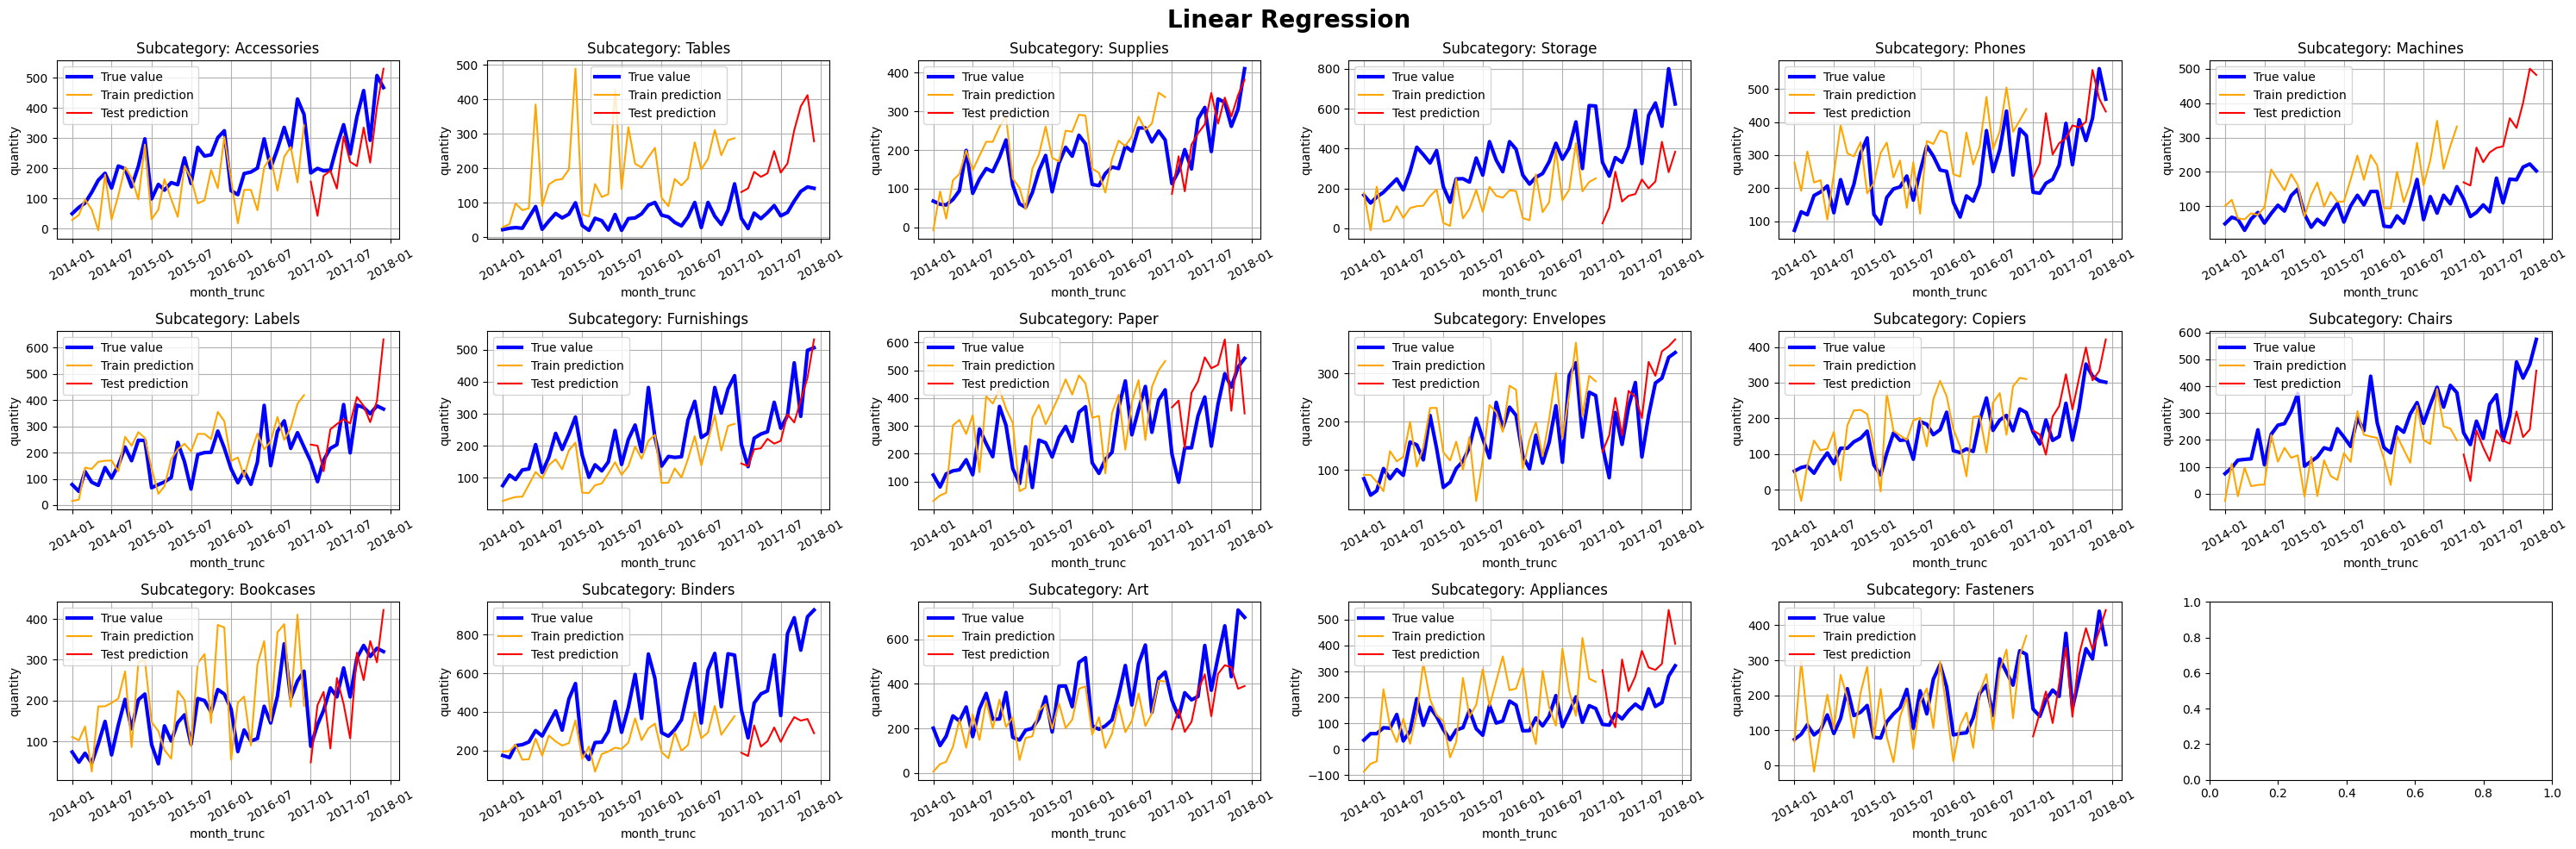

train_mae  train_mape  train_rmse    test_mae  test_mape  \
Accessories   74.589259    0.389272   96.328364   78.028053   0.255495   
Tables       131.791007    2.518341  159.640118  152.543650   1.995704   
Supplies      48.797402    0.381667   55.958325   52.711244   0.250343   
Storage      169.085004    0.564410  188.704164  256.185694   0.527925   
Phones       103.597917    0.623786  116.171082   83.731804   0.304198   
Machines      76.003759    0.958585   92.750005  162.354435   1.213074   
Labels        68.345860    0.523310   80.690462   76.420570   0.377546   
Furnishings   70.537935    0.356665   79.621966   56.963717   0.174304   
Paper        132.822146    0.692187  144.980749  153.151673   0.673141   
Envelopes     43.844813    0.344950   53.252397   43.561912   0.264893   
Copiers       65.929490    0.579282   78.955461   61.665339   0.315171   
Chairs        94.828058    0.458679  115.629450  124.354595   0.360638   
Bookcases     79.018095    0.618809   93.033754   65.775964   0.296095   
Binders      150.536373    0.352559  182.461638  334.922293   0.508479   
Art           94.388014    0.335830  122.165485  138.786269   0.281012   
Appliances   112.142808    1.359235  141.245445  137.940942   0.896965   
Fasteners     58.702480    0.446631   75.649491   51.526279   0.209916   

              test_rmse  
Accessories   95.621299  
Tables       162.210724  
Supplies      65.065451  
Storage      292.643824  
Phones        98.207699  
Machines     175.599067  
Labels       102.027556  
Furnishings   76.695948  
Paper        172.475802  
Envelopes     53.562975  
Copiers       71.209137  
Chairs       145.424877  
Bookcases     75.550853  
Binders      376.686622  
Art          170.278761  
Appliances   155.495952  
Fasteners     58.631686

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_lag, y_train)
display_preds(reg.predict(X_train_lag), reg.predict(X_test_lag), 'Linear Regression')

Overall train MAE: 92.59
Overall test MAE: 119.41
Overall train MAPE: 0.68
Overall test MAPE: 0.52
Overall train RMSE: 117.37
Overall test RMSE: 161.79


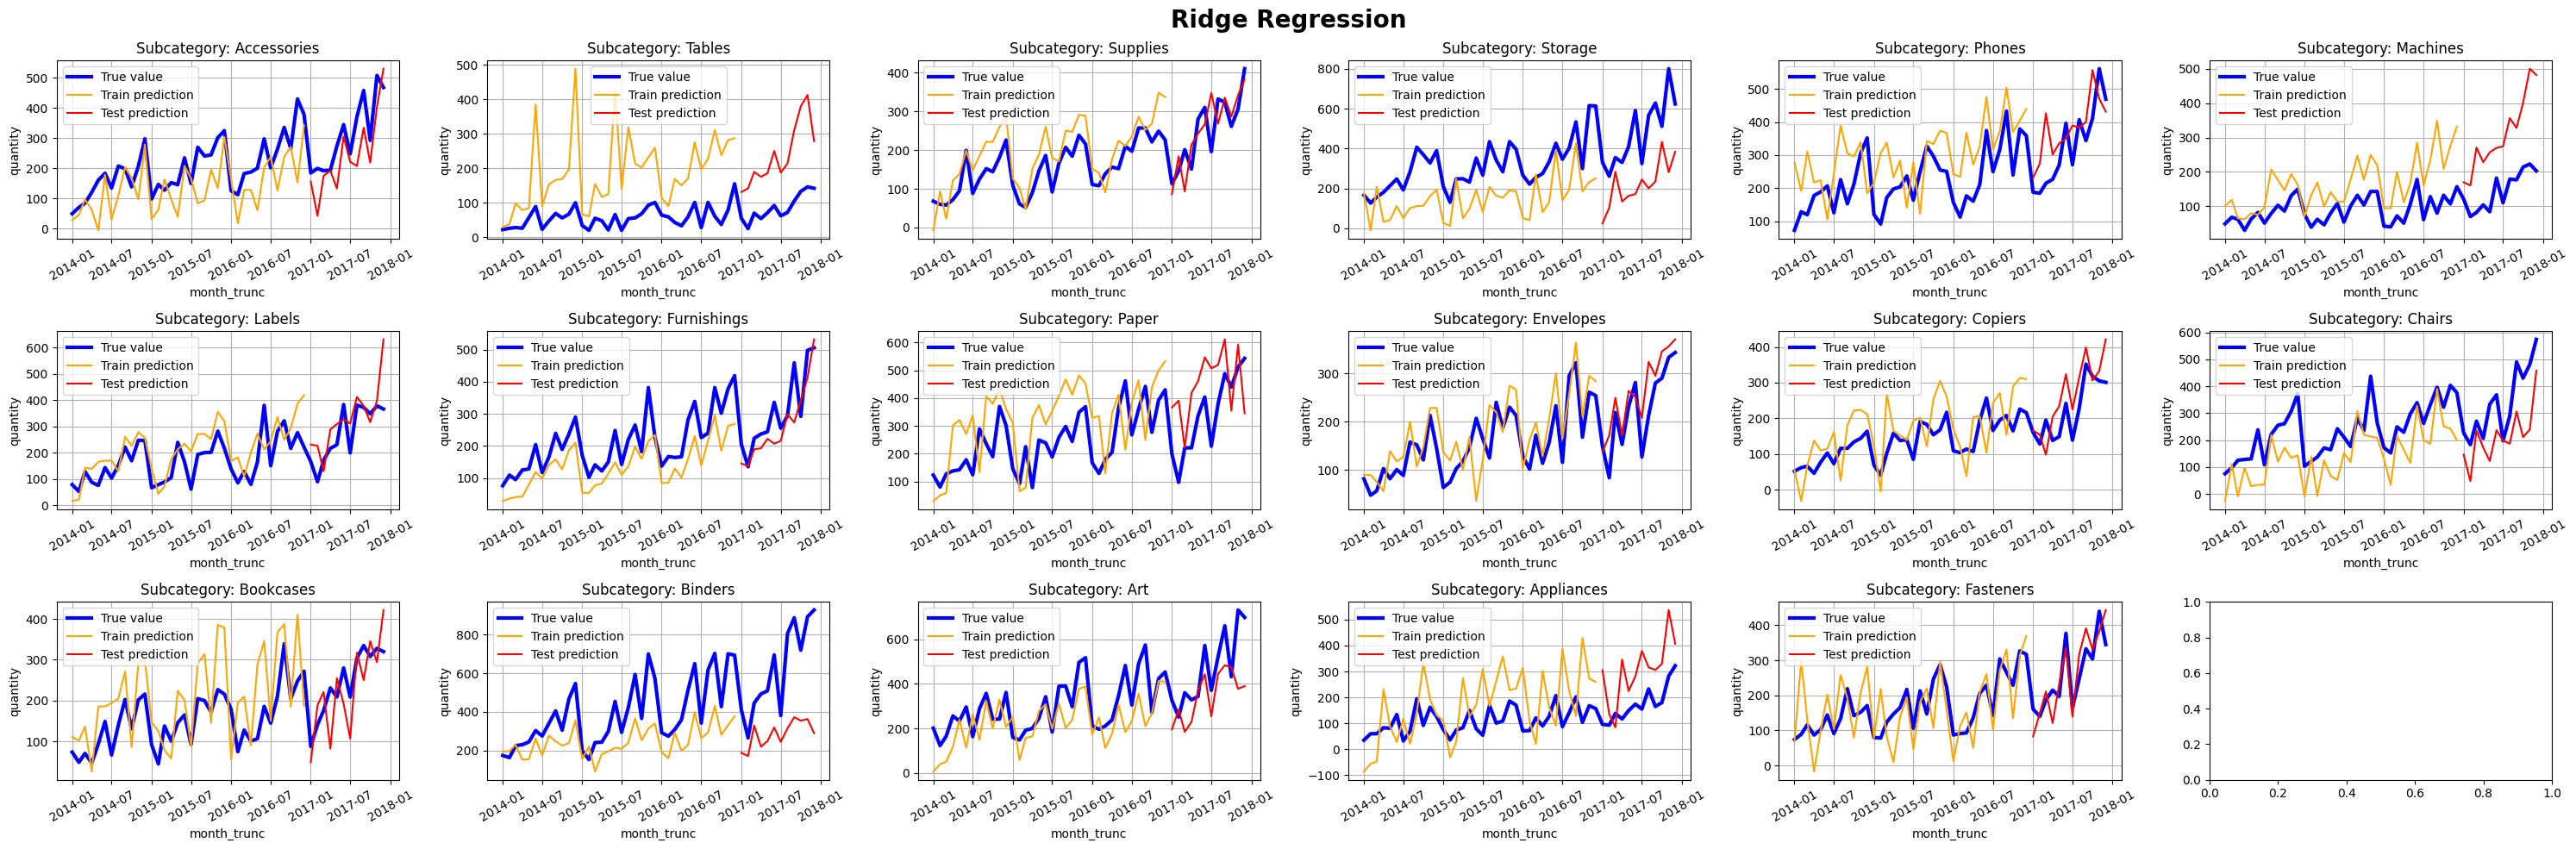

train_mae  train_mape  train_rmse    test_mae  test_mape  \
Accessories   74.535218    0.388876   96.244696   77.954273   0.255240   
Tables       131.807055    2.519178  159.601235  152.573671   1.996073   
Supplies      48.732480    0.381069   55.887375   52.728024   0.250473   
Storage      169.003901    0.564040  188.631760  256.166094   0.527871   
Phones       103.415639    0.622828  116.004198   83.616674   0.303579   
Machines      76.014388    0.958811   92.744464  162.374964   1.213393   
Labels        68.271689    0.522656   80.621458   76.356579   0.377205   
Furnishings   70.452185    0.356073   79.552289   56.924289   0.174164   
Paper        132.529178    0.690727  144.703230  152.907280   0.672148   
Envelopes     43.849141    0.345206   53.248828   43.478423   0.264420   
Copiers       65.927282    0.579236   78.926604   61.687754   0.315105   
Chairs        94.729631    0.458031  115.509441  124.320764   0.360594   
Bookcases     78.985278    0.618458   93.020219   65.606627   0.295358   
Binders      150.597157    0.352668  182.519435  335.074317   0.508807   
Art           94.441211    0.335841  122.193120  138.817116   0.281000   
Appliances   112.050760    1.357995  141.125301  137.884541   0.896519   
Fasteners     58.638689    0.446084   75.566900   51.507693   0.209747   

              test_rmse  
Accessories   95.537225  
Tables       162.242387  
Supplies      65.077772  
Storage      292.595108  
Phones        98.050955  
Machines     175.587205  
Labels       101.929045  
Furnishings   76.639113  
Paper        172.240578  
Envelopes     53.474708  
Copiers       71.230277  
Chairs       145.359892  
Bookcases     75.440734  
Binders      376.786756  
Art          170.375245  
Appliances   155.405396  
Fasteners     58.601858

In [ ]:
from sklearn.linear_model import Ridge

reg = Ridge(random_state=42).fit(X_train_lag, y_train)
display_preds(reg.predict(X_train_lag), reg.predict(X_test_lag), 'Ridge Regression')

Overall train MAE: 91.11
Overall test MAE: 119.43
Overall train MAPE: 0.67
Overall test MAPE: 0.52
Overall train RMSE: 116.06
Overall test RMSE: 162.64


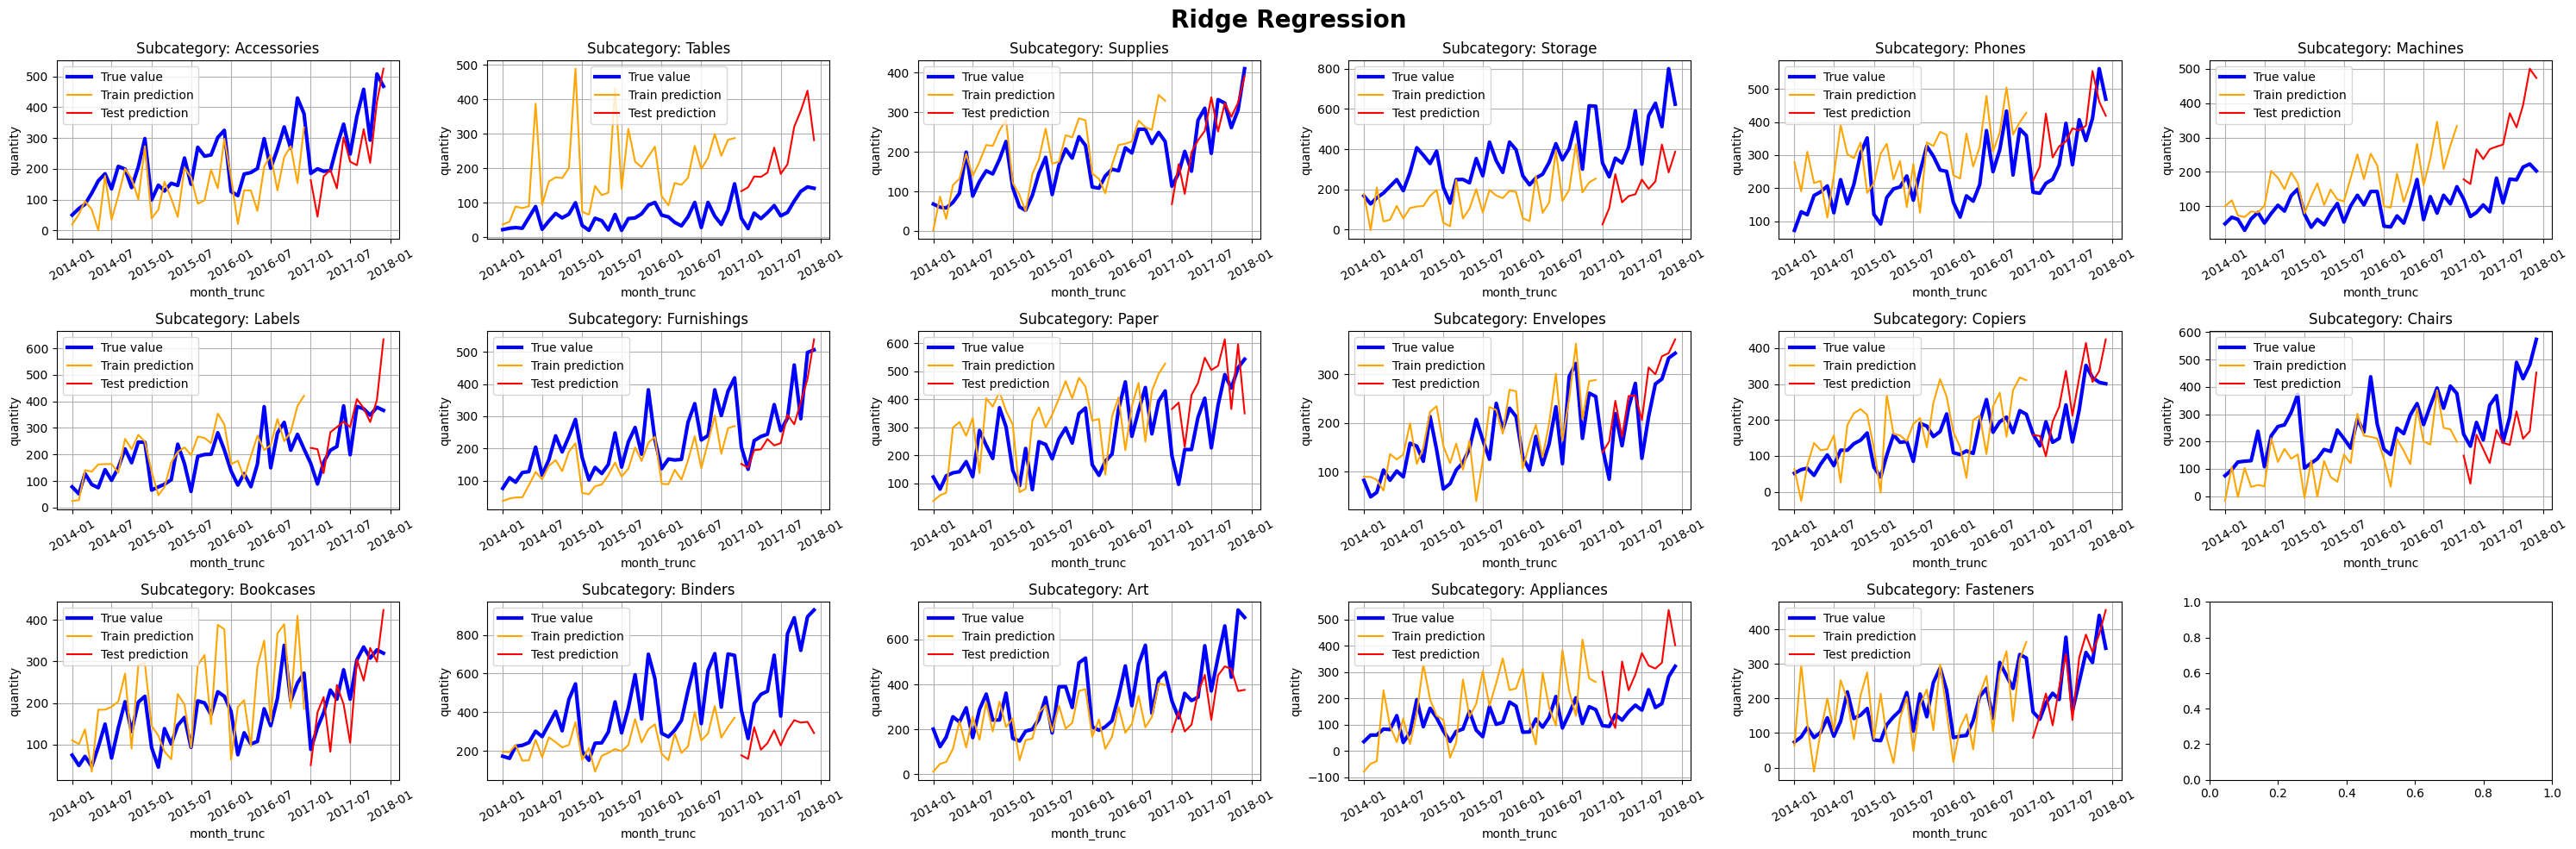

train_mae  train_mape  train_rmse    test_mae  test_mape  \
Accessories   73.878385    0.384186   94.790377   76.043452   0.249033   
Tables       133.181006    2.563786  159.734835  153.285144   2.004315   
Supplies      42.690160    0.328122   49.663363   51.539913   0.246076   
Storage      166.809531    0.554434  186.675545  256.137742   0.528157   
Phones       100.174770    0.606991  113.473451   81.959378   0.290588   
Machines      77.706177    0.982998   93.456235  165.413890   1.242962   
Labels        63.922723    0.485608   77.117987   73.955029   0.361507   
Furnishings   66.320619    0.329102   76.051002   55.793082   0.169461   
Paper        127.353100    0.663463  140.155807  151.879524   0.668135   
Envelopes     43.043136    0.345970   52.843691   38.835310   0.238597   
Copiers       66.653838    0.583676   78.640398   63.128233   0.313720   
Chairs        91.961342    0.439743  112.472374  124.967684   0.363339   
Bookcases     77.108345    0.595964   92.060901   60.252372   0.270876   
Binders      153.872827    0.361354  185.233115  343.850118   0.526401   
Art           96.156505    0.337610  122.571533  141.583768   0.285365   
Appliances   110.756046    1.338859  138.816442  139.138968   0.901899   
Fasteners     57.261701    0.436804   74.107012   52.615940   0.213177   

              test_rmse  
Accessories   93.709341  
Tables       163.569132  
Supplies      64.756501  
Storage      291.348149  
Phones        95.981311  
Machines     177.198232  
Labels       100.198892  
Furnishings   75.039977  
Paper        170.384328  
Envelopes     48.485093  
Copiers       72.761031  
Chairs       145.349217  
Bookcases     73.191427  
Binders      383.787016  
Art          175.043224  
Appliances   155.325924  
Fasteners     59.845670

In [ ]:
from sklearn.linear_model import Lasso

reg = Lasso(random_state=42).fit(X_train_lag, y_train)
display_preds(reg.predict(X_train_lag), reg.predict(X_test_lag), 'Ridge Regression')

## CatBoost

In [ ]:
!pip install catboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00


Overall train MAE: 88.65
Overall test MAE: 131.33
Overall train MAPE: 0.6
Overall test MAPE: 0.49
Overall train RMSE: 116.0
Overall test RMSE: 178.68


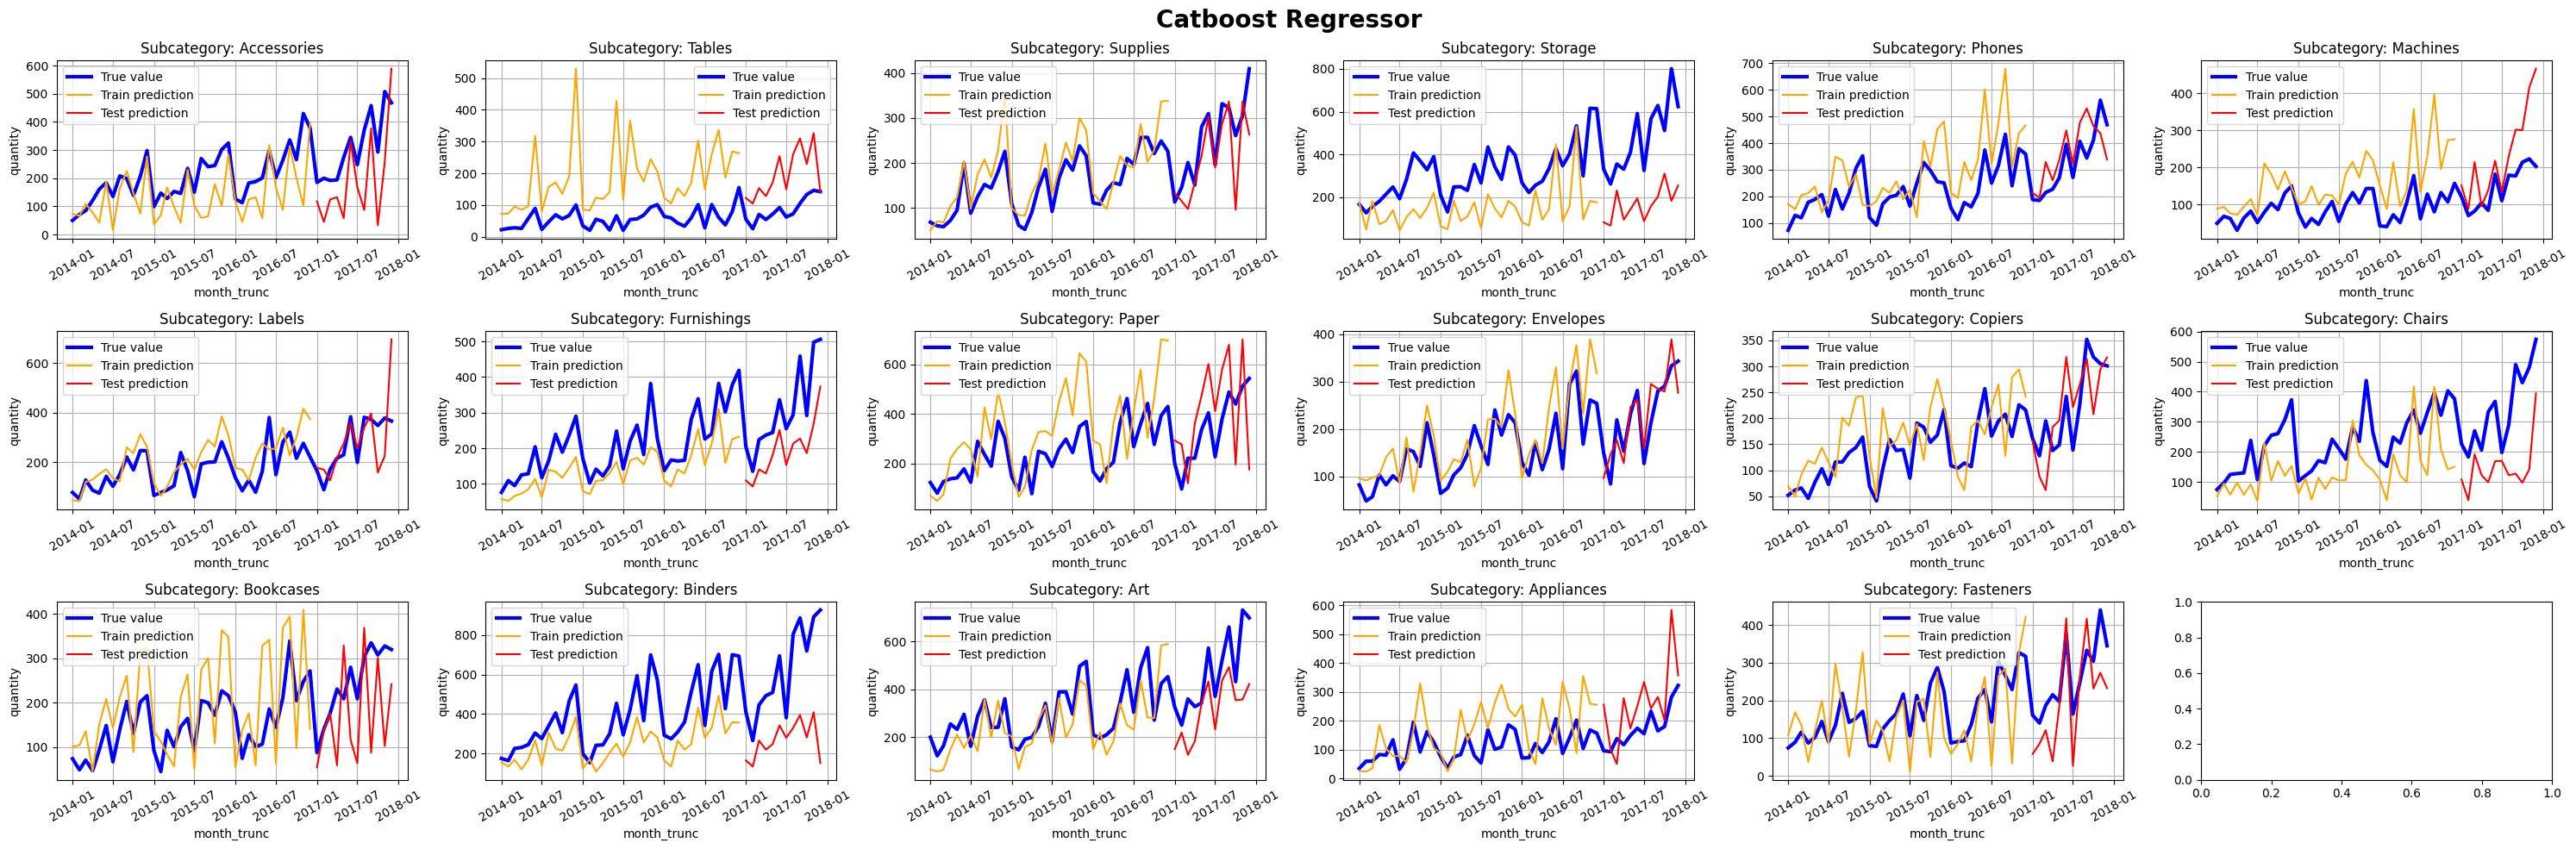

train_mae  train_mape  train_rmse    test_mae  test_mape  \
Accessories   73.592163    0.371863  102.555412  138.197430   0.462061   
Tables       130.057161    2.516686  158.431604  110.244083   1.504704   
Supplies      35.456875    0.245101   45.587639   53.246926   0.207718   
Storage      167.710718    0.536150  194.618093  310.677728   0.647021   
Phones        95.203736    0.468883  114.414058   76.162957   0.230699   
Machines      74.471062    0.941357   94.748001   85.373145   0.569634   
Labels        64.357161    0.452565   76.117164   83.665390   0.318493   
Furnishings   68.556473    0.317474   81.748551  113.409292   0.365801   
Paper        141.470306    0.626049  159.043137  185.351797   0.636891   
Envelopes     44.973164    0.327472   56.079196   38.953615   0.219195   
Copiers       51.602972    0.435735   60.941215   53.355744   0.273335   
Chairs       102.058319    0.424908  125.152884  188.835738   0.541216   
Bookcases     83.564274    0.608614   95.007918  104.887222   0.407977   
Binders      147.621149    0.353728  175.815891  351.687752   0.540536   
Art           80.227751    0.278736  104.107309  153.308348   0.322298   
Appliances    87.019515    0.944496  116.133932   98.313084   0.630155   
Fasteners     59.186450    0.395225   80.867375   86.947277   0.373368   

              test_rmse  
Accessories  163.791812  
Tables       124.562347  
Supplies      75.413461  
Storage      337.127197  
Phones        90.912724  
Machines     114.175400  
Labels       123.998322  
Furnishings  126.811562  
Paper        197.685068  
Envelopes     45.691541  
Copiers       65.507910  
Chairs       216.069087  
Bookcases    133.908594  
Binders      396.956148  
Art          182.883822  
Appliances   130.302469  
Fasteners    101.245720

In [ ]:
from catboost import CatBoostRegressor, Pool

train_pool = Pool(
    X_train,
    y_train
)
test_pool = Pool(
    X_test,
    y_test
)

reg = CatBoostRegressor(random_state=42, silent=True)
reg.fit(train_pool)
display_preds(reg.predict(X_train), reg.predict(X_test), 'Catboost Regressor')

Overall train MAE: 72.06
Overall test MAE: 96.25
Overall train MAPE: 0.52
Overall test MAPE: 0.38
Overall train RMSE: 97.47
Overall test RMSE: 144.49


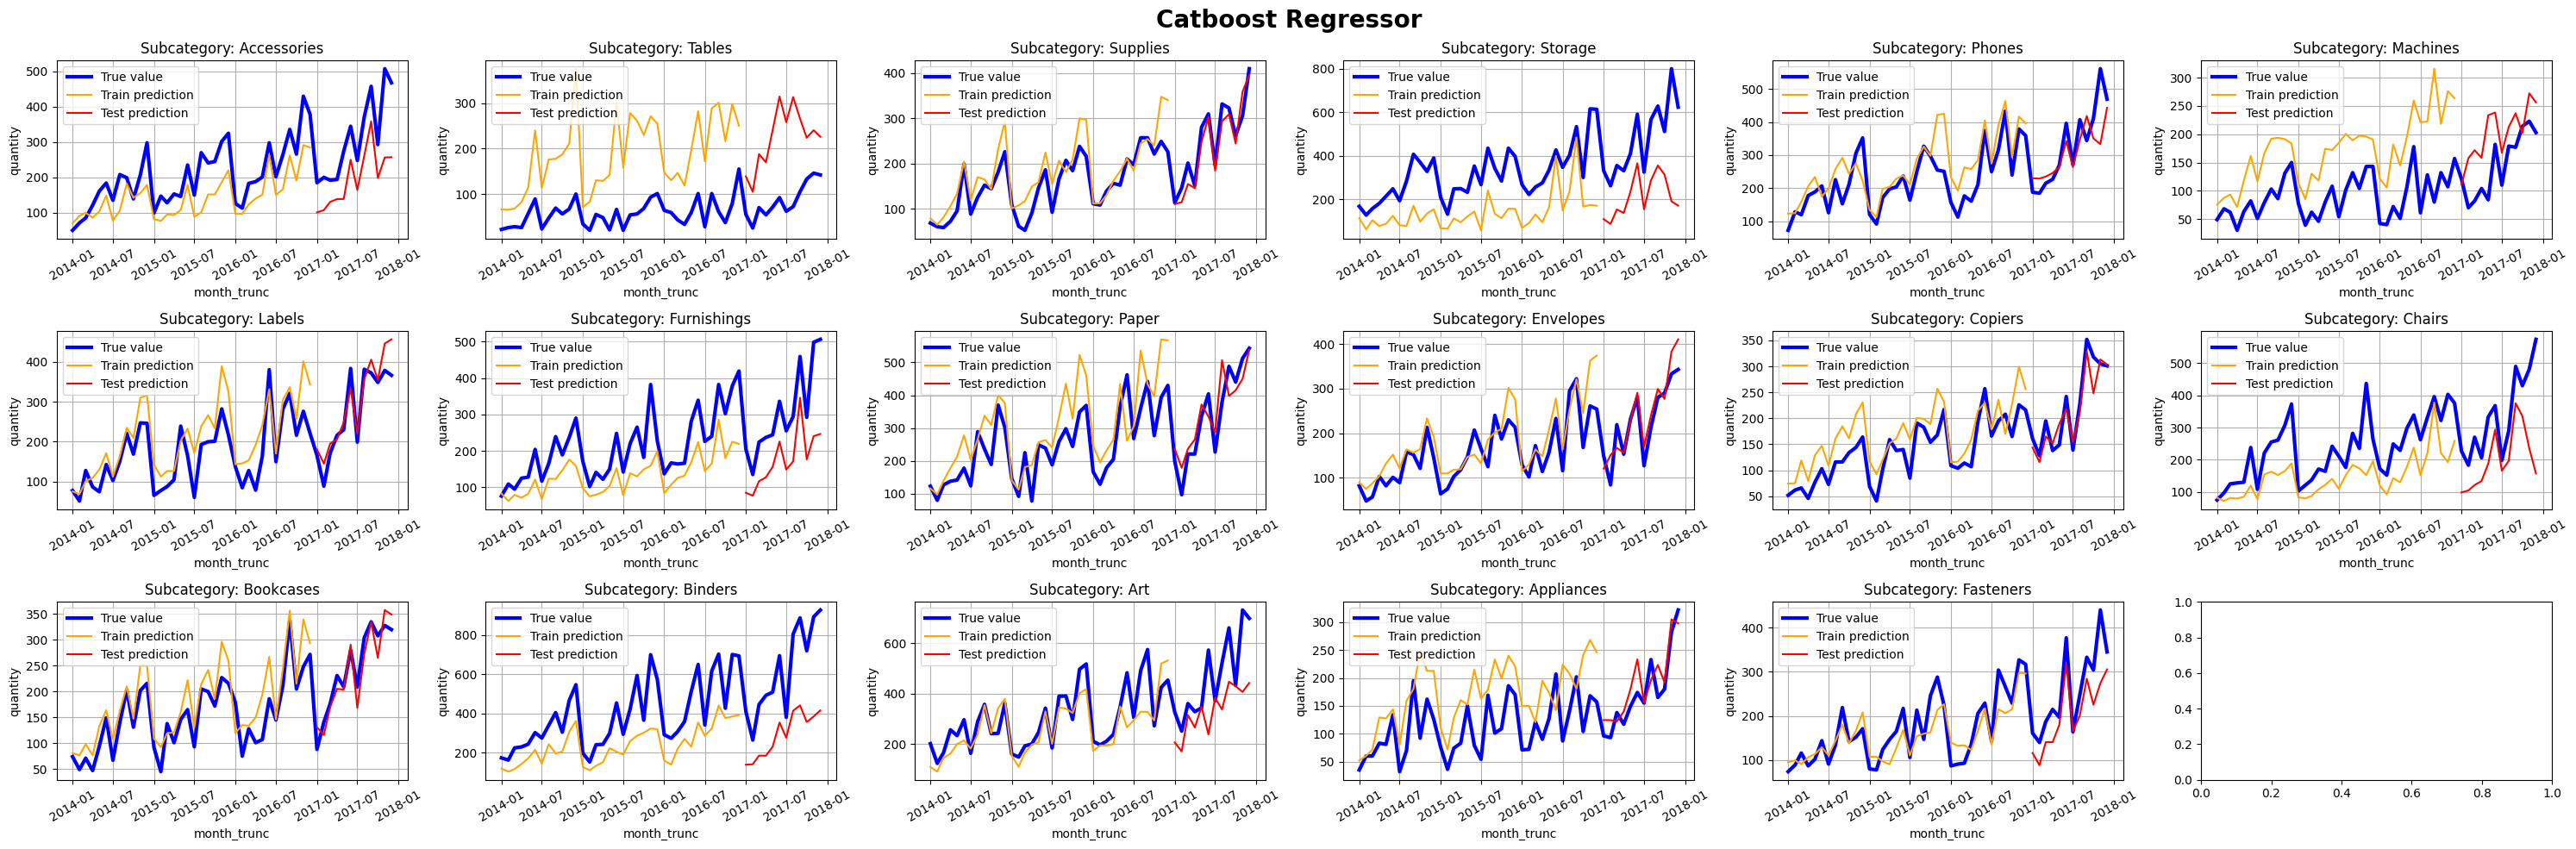

train_mae  train_mape  train_rmse    test_mae  test_mape  \
Accessories   61.442987    0.297048   72.252872  114.546307   0.367935   
Tables       129.684539    2.589575  144.399295  138.134053   1.943854   
Supplies      32.188334    0.255539   43.068657   22.820227   0.094861   
Storage      171.862596    0.551362  194.562345  265.266317   0.553514   
Phones        51.643968    0.273480   67.522387   53.372583   0.149657   
Machines      81.415304    1.074838   91.810583   59.498284   0.552752   
Labels        49.656408    0.374579   60.856762   34.497433   0.151027   
Furnishings   75.968586    0.345201   90.059703  130.726747   0.429476   
Paper         74.691931    0.333728   91.683456   54.541740   0.213078   
Envelopes     36.921236    0.272243   46.022811   31.766770   0.184077   
Copiers       37.996449    0.353961   43.729935   22.731850   0.110752   
Chairs        85.402557    0.348096  102.263826  136.998984   0.392284   
Bookcases     33.970546    0.288824   41.249078   24.146938   0.124485   
Binders      154.110566    0.376353  181.199406  325.582385   0.521621   
Art           53.768427    0.167559   78.487038  136.770591   0.260985   
Appliances    63.551659    0.715803   76.834816   28.625513   0.185735   
Fasteners     30.811656    0.202567   37.981151   56.192421   0.214991   

              test_rmse  
Accessories  127.666782  
Tables       148.880956  
Supplies      27.976880  
Storage      294.541858  
Phones        77.830737  
Machines      69.399974  
Labels        42.394914  
Furnishings  143.652247  
Paper         63.900431  
Envelopes     38.924288  
Copiers       28.471803  
Chairs       168.897799  
Bookcases     28.162814  
Binders      348.803836  
Art          180.177542  
Appliances    32.987424  
Fasteners     68.238416

In [ ]:
from catboost import CatBoostRegressor, Pool

train_pool = Pool(
    info.iloc[:index_75_percent].drop(columns=['month_trunc']),
    y_train,
    cat_features=['sub-category']
)
test_pool = Pool(
    info.iloc[index_75_percent:].drop(columns=['month_trunc']),
    y_test,
    cat_features=['sub-category']
)

reg = CatBoostRegressor(random_state=42, silent=True)
reg.fit(train_pool)
display_preds(reg.predict(train_pool), reg.predict(test_pool), 'Catboost Regressor')

# Random Forest

Overall train MAE: 87.94
Overall test MAE: 131.2
Overall train MAPE: 0.61
Overall test MAPE: 0.49
Overall train RMSE: 115.94
Overall test RMSE: 179.13


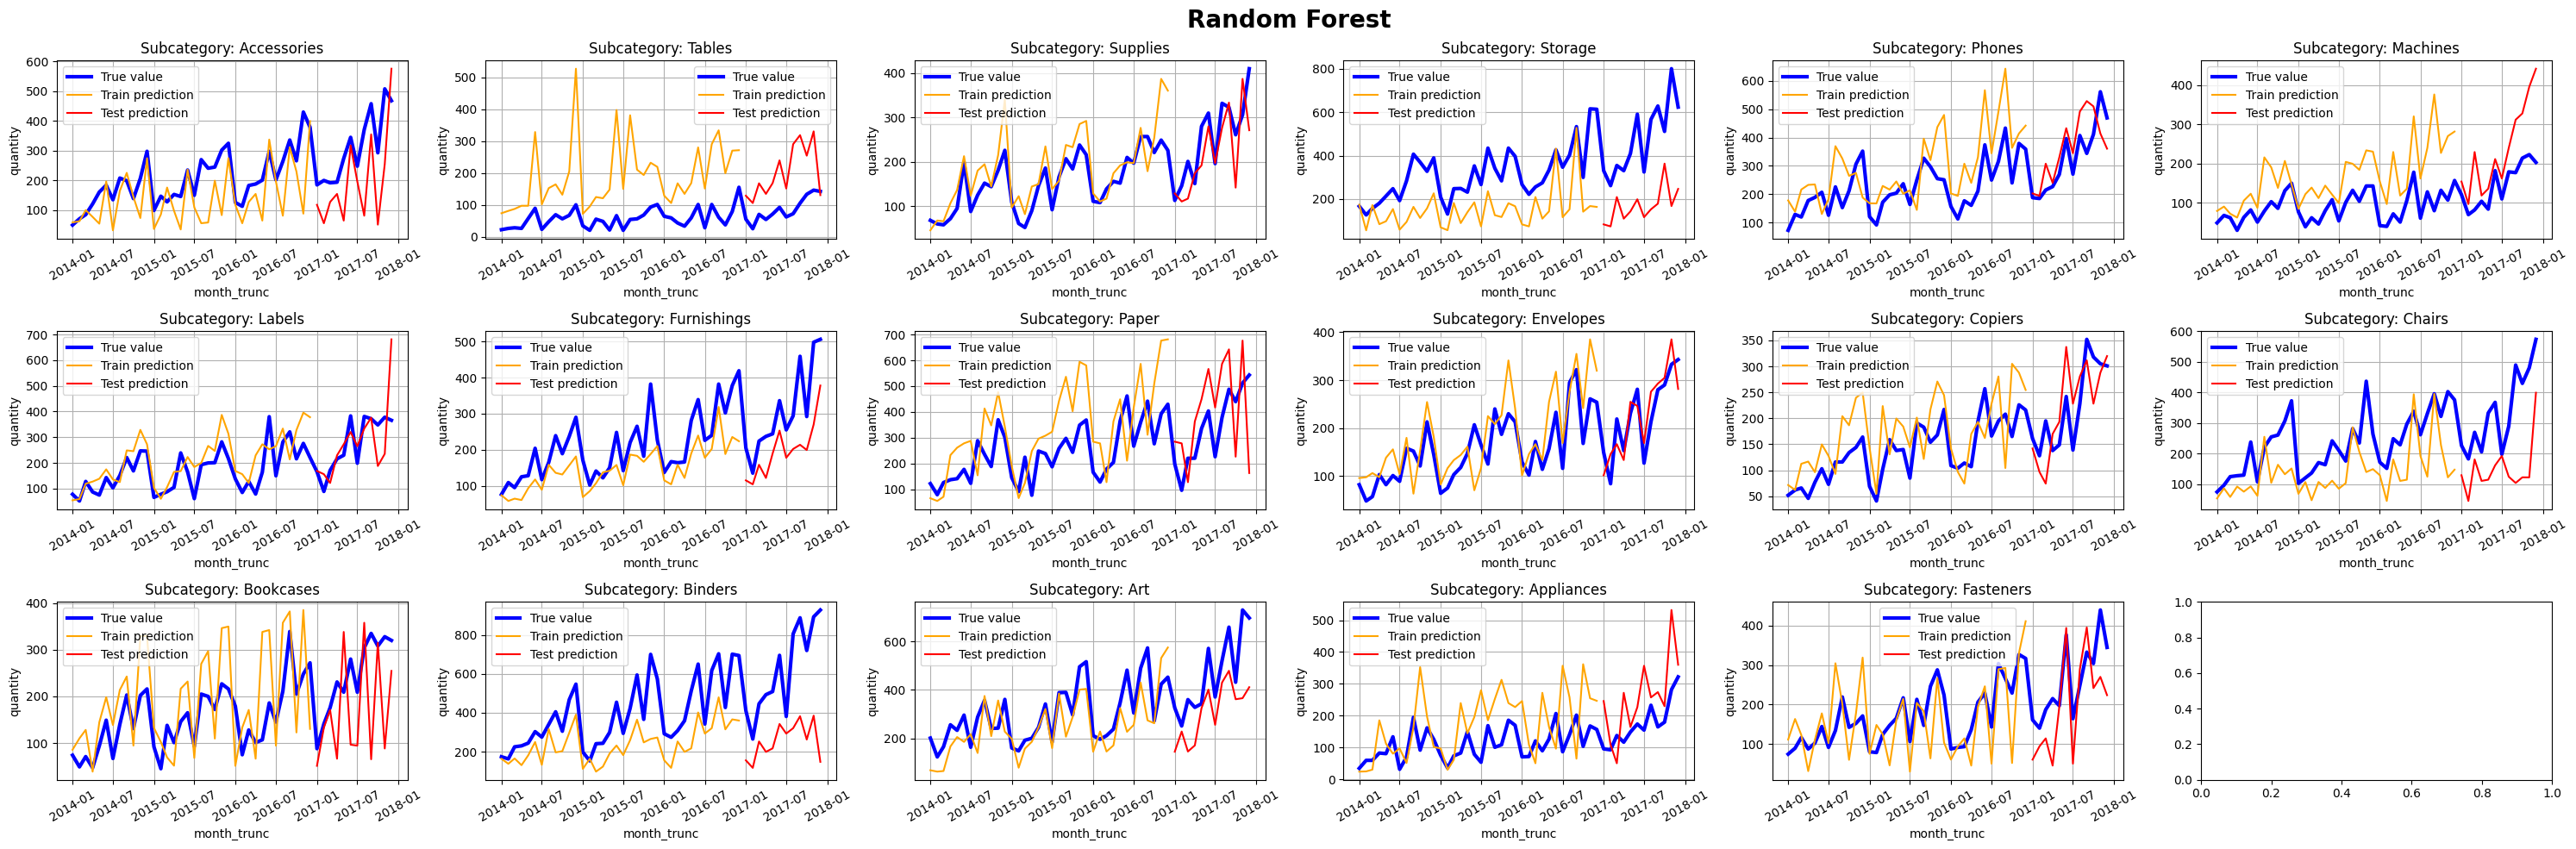

train_mae  train_mape  train_rmse    test_mae  test_mape  \
Accessories   71.084722    0.346779  103.202347  133.124167   0.435663   
Tables       133.896389    2.654361  160.150418  117.830833   1.596750   
Supplies      38.782778    0.277483   51.556226   56.857500   0.219092   
Storage      161.033611    0.508995  189.828121  307.700833   0.635796   
Phones        91.952222    0.457550  108.554178   76.892500   0.223373   
Machines      78.204444    1.001849   95.972376   89.776667   0.620006   
Labels        64.173056    0.448913   77.257951   81.093333   0.302993   
Furnishings   61.973611    0.276185   78.428450  108.540833   0.341338   
Paper        137.438333    0.618519  154.957710  173.899167   0.609407   
Envelopes     48.269444    0.353731   58.637848   40.495833   0.225556   
Copiers       55.605278    0.463746   65.179985   54.188333   0.274195   
Chairs        98.727500    0.406558  124.552282  186.576667   0.527686   
Bookcases     78.014167    0.568366   91.103734  106.370000   0.414465   
Binders      154.630556    0.369170  185.263010  363.288333   0.561560   
Art           77.411667    0.266444  102.271537  156.065833   0.325373   
Appliances    91.495556    0.998900  120.616280   95.899167   0.621206   
Fasteners     52.273611    0.354179   74.742246   81.856667   0.349463   

              test_rmse  
Accessories  159.807220  
Tables       131.924608  
Supplies      71.245230  
Storage      338.401446  
Phones        92.874184  
Machines     112.501608  
Labels       117.145656  
Furnishings  125.184572  
Paper        188.760395  
Envelopes     44.307216  
Copiers       63.906249  
Chairs       216.890836  
Bookcases    138.247194  
Binders      407.732462  
Art          184.391718  
Appliances   121.522708  
Fasteners     97.086331

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42, n_estimators=100).fit(X_train, y_train)
display_preds(reg.predict(X_train), reg.predict(X_test), 'Random Forest')

# Vector Auto Regression

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Stationary' if result[1] <= 0.05 else 'Non-stationary')

# Тест на стационарность
for column in X_train.columns:
    print(f'ADF Test for {column}')
    adf_test(X_train[column])
    print()

ADF Test for year
ADF Statistic: -0.8640749496590826
p-value: 0.799572791211212
Non-stationary

ADF Test for month
ADF Statistic: -2.41158930986278
p-value: 0.13849209349110936
Non-stationary

ADF Test for appliances
ADF Statistic: -11.522276751354957
p-value: 4.0132092180891295e-21
Stationary

ADF Test for art
ADF Statistic: -7.492646268876803
p-value: 4.463452698564032e-11
Stationary

ADF Test for binders
ADF Statistic: -9.04621719380997
p-value: 4.978621789567877e-15
Stationary

ADF Test for bookcases
ADF Statistic: -12.178686323054766
p-value: 1.3673652854892335e-22
Stationary

ADF Test for chairs
ADF Statistic: -9.536532574733572
p-value: 2.799037237938511e-16
Stationary

ADF Test for copiers
ADF Statistic: -8.616079501603034
p-value: 6.285293601106216e-14
Stationary

ADF Test for envelopes
ADF Statistic: -8.83915513451249
p-value: 1.6868686558851676e-14
Stationary

ADF Test for fasteners
ADF Statistic: -9.806666237226375
p-value: 5.801628740687851e-17
Stationary

ADF Test for fur

In [ ]:
X_train_var = X_train.copy()
X_test_var = X_test.copy()

X_train_var['year'] = X_train_var['year'].diff().fillna(0)
X_train_var['month'] = X_train_var['month'].diff().fillna(0)

X_test_var['year'] = X_test_var['year'].diff().fillna(0)
X_test_var['month'] = X_test_var['month'].diff().fillna(0)

for column in X_train_var.columns:
    print(f'ADF Test for {column}')
    adf_test(X_train_var[column])
    print()

ADF Test for year
ADF Statistic: -24.75910296379223
p-value: 0.0
Stationary

ADF Test for month
ADF Statistic: -24.695715915520328
p-value: 0.0
Stationary

ADF Test for appliances
ADF Statistic: -11.522276751354957
p-value: 4.0132092180891295e-21
Stationary

ADF Test for art
ADF Statistic: -7.492646268876803
p-value: 4.463452698564032e-11
Stationary

ADF Test for binders
ADF Statistic: -9.04621719380997
p-value: 4.978621789567877e-15
Stationary

ADF Test for bookcases
ADF Statistic: -12.178686323054766
p-value: 1.3673652854892335e-22
Stationary

ADF Test for chairs
ADF Statistic: -9.536532574733572
p-value: 2.799037237938511e-16
Stationary

ADF Test for copiers
ADF Statistic: -8.616079501603034
p-value: 6.285293601106216e-14
Stationary

ADF Test for envelopes
ADF Statistic: -8.83915513451249
p-value: 1.6868686558851676e-14
Stationary

ADF Test for fasteners
ADF Statistic: -9.806666237226375
p-value: 5.801628740687851e-17
Stationary

ADF Test for furnishings
ADF Statistic: -8.1136894991

In [ ]:
X_train_var.corr()

year     month  appliances       art   binders  bookcases  \
year         1.000000 -0.941494   -0.014315 -0.014315 -0.014315  -0.014315   
month       -0.941494  1.000000   -0.006706  0.003658 -0.006706   0.003658   
appliances  -0.014315 -0.006706    1.000000 -0.062500 -0.062500  -0.062500   
art         -0.014315  0.003658   -0.062500  1.000000 -0.062500  -0.062500   
binders     -0.014315 -0.006706   -0.062500 -0.062500  1.000000  -0.062500   
bookcases   -0.014315  0.003658   -0.062500 -0.062500 -0.062500   1.000000   
chairs      -0.014315 -0.006706   -0.062500 -0.062500 -0.062500  -0.062500   
copiers     -0.014315  0.128019   -0.062500 -0.062500 -0.062500  -0.062500   
envelopes    0.107362 -0.017069   -0.062500 -0.062500 -0.062500  -0.062500   
fasteners   -0.014315 -0.006706   -0.062500 -0.062500 -0.062500  -0.062500   
furnishings -0.014315 -0.006706   -0.062500 -0.062500 -0.062500  -0.062500   
labels      -0.014315 -0.006706   -0.062500 -0.062500 -0.062500  -0.062500   
machines    -0.014315 -0.006706   -0.062500 -0.062500 -0.062500  -0.062500   
paper       -0.014315 -0.006706   -0.062500 -0.062500 -0.062500  -0.062500   
phones      -0.014315 -0.006706   -0.062500 -0.062500 -0.062500  -0.062500   
storage     -0.014315 -0.006706   -0.062500 -0.062500 -0.062500  -0.062500   
supplies    -0.014315 -0.006706   -0.062500 -0.062500 -0.062500  -0.062500   
tables      -0.014315 -0.006706   -0.062500 -0.062500 -0.062500  -0.062500   

               chairs   copiers  envelopes  fasteners  furnishings    labels  \
year        -0.014315 -0.014315   0.107362  -0.014315    -0.014315 -0.014315   
month       -0.006706  0.128019  -0.017069  -0.006706    -0.006706 -0.006706   
appliances  -0.062500 -0.062500  -0.062500  -0.062500    -0.062500 -0.062500   
art         -0.062500 -0.062500  -0.062500  -0.062500    -0.062500 -0.062500   
binders     -0.062500 -0.062500  -0.062500  -0.062500    -0.062500 -0.062500   
bookcases   -0.062500 -0.062500  -0.062500  -0.062500    -0.062500 -0.062500   
chairs       1.000000 -0.062500  -0.062500  -0.062500    -0.062500 -0.062500   
copiers     -0.062500  1.000000  -0.062500  -0.062500    -0.062500 -0.062500   
envelopes   -0.062500 -0.062500   1.000000  -0.062500    -0.062500 -0.062500   
fasteners   -0.062500 -0.062500  -0.062500   1.000000    -0.062500 -0.062500   
furnishings -0.062500 -0.062500  -0.062500  -0.062500     1.000000 -0.062500   
labels      -0.062500 -0.062500  -0.062500  -0.062500    -0.062500  1.000000   
machines    -0.062500 -0.062500  -0.062500  -0.062500    -0.062500 -0.062500   
paper       -0.062500 -0.062500  -0.062500  -0.062500    -0.062500 -0.062500   
phones      -0.062500 -0.062500  -0.062500  -0.062500    -0.062500 -0.062500   
storage     -0.062500 -0.062500  -0.062500  -0.062500    -0.062500 -0.062500   
supplies    -0.062500 -0.062500  -0.062500  -0.062500    -0.062500 -0.062500   
tables      -0.062500 -0.062500  -0.062500  -0.062500    -0.062500 -0.062500   

             machines     paper    phones   storage  supplies    tables  
year        -0.014315 -0.014315 -0.014315 -0.014315 -0.014315 -0.014315  
month       -0.006706 -0.006706 -0.006706 -0.006706 -0.006706 -0.006706  
appliances  -0.062500 -0.062500 -0.062500 -0.062500 -0.062500 -0.062500  
art         -0.062500 -0.062500 -0.062500 -0.062500 -0.062500 -0.062500  
binders     -0.062500 -0.062500 -0.062500 -0.062500 -0.062500 -0.062500  
bookcases   -0.062500 -0.062500 -0.062500 -0.062500 -0.062500 -0.062500  
chairs      -0.062500 -0.062500 -0.062500 -0.062500 -0.062500 -0.062500  
copiers     -0.062500 -0.062500 -0.062500 -0.062500 -0.062500 -0.062500  
envelopes   -0.062500 -0.062500 -0.062500 -0.062500 -0.062500 -0.062500  
fasteners   -0.062500 -0.062500 -0.062500 -0.062500 -0.062500 -0.062500  
furnishings -0.062500 -0.062500 -0.062500 -0.062500 -0.062500 -0.062500  
labels      -0.062500 -0.062500 -0.062500 -0.062500 -0.062500 -0.062500  
machines     1.000000 -0.062500 -0.062500 -0.062500

In [ ]:
X_train_var['quantity'] = y_train
X_test_var['quantity'] = y_test
model = VAR(np.array(X_train_var.drop(columns=['year'])).astype(float))
lag_order = model.select_order()
print(lag_order.summary())

# Fit the model with the selected lag
lag = lag_order.selected_orders['aic']
var_model = model.fit(lag)

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        4.320       4.453       75.20       4.372
1       -6.813      -4.284    0.001100      -5.828
2       -9.813     -4.888*   5.491e-05      -7.894
3       -11.61      -4.290   9.150e-06      -8.760
4       -13.54      -3.825   1.345e-06      -9.757
5       -14.55      -2.437   5.012e-07      -9.832
6       -15.55      -1.044   1.899e-07      -9.902
7       -17.03     -0.1292   4.517e-08      -10.45
8       -18.98      0.3191   6.846e-09      -11.46
9       -21.03      0.6670   9.557e-10      -12.58
10      -23.51      0.5801   8.824e-11      -14.13
11      -25.22       1.273   1.821e-11      -14.90
12      -26.85       2.036   4.148e-12      -15.60
13      -28.77       2.512   7.322e-13      -16.59
14      -30.73       2.948   1.289e-13      -17.61
15      -32.69       3.385   2.371e-14      -18.64
16      -36.12       2.350   1.

In [ ]:
columns = X_train_var.drop(columns=['year']).columns
train_pred = pd.DataFrame(var_model.forecast(np.array(X_train_var.drop(columns=['year'])).astype(float), steps=len(X_train_var)), columns=columns)
test_pred = pd.DataFrame(var_model.forecast(np.array(X_test_var.drop(columns=['year'])).astype(float), steps=len(X_test_var)), columns=columns)

## Informer

In [ ]:
!git clone https://github.com/zhouhaoyi/Informer2020.git

Cloning into 'Informer2020'...
remote: Enumerating objects: 576, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 576 (delta 181), reused 176 (delta 176), pack-reused 378 (from 1)
Receiving objects: 100% (576/576), 6.48 MiB | 14.48 MiB/s, done.
Resolving deltas: 100% (335/335), done.


In [ ]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=bc62f16b879e7422e6d505c59043ca60e40bba68176afaf2a48965c230f8a8e5
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
from Informer2020.models.model import Informer
import torch

# Hyperparameters
seq_len = 96
label_len = 48
pred_len = 24
input_dim = 10  # Number of features
output_dim = 1  # Forecast dimension

# Instantiate the Informer model
model = Informer(
    enc_in=input_dim,
    dec_in=input_dim,
    c_out=output_dim,
    seq_len=seq_len,
    label_len=label_len,
    out_len=pred_len,
    factor=5,
    d_model=512,
    n_heads=8,
    e_layers=2,
    d_layers=1,
    dropout=0.1,
    attn='prob',
    embed='timeF',
    freq='h',
    activation='gelu',
    output_attention=False
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
device

device(type='cpu')

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam

train_loader = DataLoader(TensorDataset(torch.tensor(X_train.values), torch.tensor(y_train)), batch_size=32, shuffle=True)

optimizer = Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()

for epoch in range(10):
    model.train()
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

TypeError: Informer.forward() missing 3 required positional arguments: 'x_mark_enc', 'x_dec', and 'x_mark_dec'

# PatchTST

In [ ]:
!git clone https://github.com/yuqinie98/PatchTST
!pip install -r PatchTST/PatchTST_supervised/requirements.txt

fatal: destination path 'PatchTST' already exists and is not an empty directory.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 767.4 kB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu121
    Uninstalling torch-2.5.1+cu121:
      Successfully uninstalled torch-2.5.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.14.0 requires torch>=1.13.0, but you have torch 1.11.0 which is incompatible.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 1.11.0 which is incompatible.
torchvision 0.20.1+cu121 requires torch==2.5.1, but you have torch 1.11.0 which is incompatible.


In [ ]:
!ls

catboost_info  global_sales_sample_dataset.xlsx  Informer2020  PatchTST  sample_data


In [ ]:
!python main_patchtst.py --data_path ./data.csv --seq_len 96 --label_len 48 --pred_len 24 --batch_size 32 --d_model 128

python3: can't open file '/content/main_patchtst.py': [Errno 2] No such file or directory


In [ ]:
!pip install neuralforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.8/256.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
X_train.shape

(612, 18)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast import NeuralForecast
from neuralforecast.models import PatchTST
#from torch.nn import MSELoss as MSE
from neuralforecast.losses.pytorch import DistributionLoss, MSE
from neuralforecast.utils import AirPassengersPanel, AirPassengersStatic, augment_calendar_df

AirPassengersPanel, calendar_cols = augment_calendar_df(df=AirPassengersPanel, freq='M')

Y_train_df = AirPassengersPanel[AirPassengersPanel.ds<AirPassengersPanel['ds'].values[-12]] # 132 train
Y_test_df = AirPassengersPanel[AirPassengersPanel.ds>=AirPassengersPanel['ds'].values[-12]].reset_index(drop=True) # 12 test

model = PatchTST(h=12,
                 input_size=18,
                 patch_len=24,
                 stride=24,
                 revin=False,
                 hidden_size=16,
                 n_heads=4,
                 scaler_type='robust',
                 #loss=DistributionLoss(distribution='StudentT', level=[80, 90]),
                 loss=MSE(),
                 learning_rate=1e-3,
                 max_steps=500,
                 val_check_steps=50,
                 early_stop_patience_steps=2)

nf = NeuralForecast(
    models=[model],
    freq='M'
)

temp = info.copy()
temp = temp.rename(columns={'sub-category': 'unique_id', 'month_trunc': 'ds'}).drop(columns=['quantity', 'year', 'month'])

nf.fit(df=temp, val_size=12)
# forecasts = nf.predict(futr_df=Y_test_df)

# Y_hat_df = forecasts.reset_index(drop=False).drop(columns=['unique_id','ds'])
# plot_df = pd.concat([Y_test_df, Y_hat_df], axis=1)
# plot_df = pd.concat([Y_train_df, plot_df])

# if model.loss.is_distribution_output:
#     plot_df = plot_df[plot_df.unique_id=='Airline1'].drop('unique_id', axis=1)
#     plt.plot(plot_df['ds'], plot_df['y'], c='black', label='True')
#     plt.plot(plot_df['ds'], plot_df['PatchTST-median'], c='blue', label='median')
#     plt.fill_between(x=plot_df['ds'][-12:],
#                     y1=plot_df['PatchTST-lo-90'][-12:].values,
#                     y2=plot_df['PatchTST-hi-90'][-12:].values,
#                     alpha=0.4, label='level 90')
#     plt.grid()
#     plt.legend()
#     plt.plot()
# else:
#     plot_df = plot_df[plot_df.unique_id=='Airline1'].drop('unique_id', axis=1)
#     plt.plot(plot_df['ds'], plot_df['y'], c='black', label='True')
#     plt.plot(plot_df['ds'], plot_df['PatchTST'], c='blue', label='Forecast')
#     plt.legend()
#     plt.grid()

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type              | Params | Mode 
-----------------------------------------------------------
0 | loss         | MSE               | 0      | train
1 | padder_train | ConstantPad1d     | 0      | train
2 | scaler       | TemporalNorm      | 0      | train
3 | model        | PatchTST_backbone | 29.5 K | train
-----------------------------------------------------------
29.5 K    Trainable params
3         Non-trainable params
29.5 K    Total params
0.118     Total estimated model params size (MB)
89        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.


In [ ]:
forecasts = nf.predict(futr_df=temp[['unique_id', 'ds', 'y']])

/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


ValueError: There are missing combinations of ids and times in `futr_df`.
You can run the `make_future_dataframe()` method to get the expected combinations or the `get_missing_future(futr_df)` method to get the missing combinations.

In [ ]:
nf.make_future_dataframe()

/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


unique_id         ds
0    Accessories 2017-12-31
1    Accessories 2018-01-31
2    Accessories 2018-02-28
3    Accessories 2018-03-31
4    Accessories 2018-04-30
..           ...        ...
199       Tables 2018-07-31
200       Tables 2018-08-31
201       Tables 2018-09-30
202       Tables 2018-10-31
203       Tables 2018-11-30

[204 rows x 2 columns]

In [ ]:
temp

ds    unique_id    y
0   2014-01-01  Accessories   50
1   2014-01-01       Tables   22
2   2014-01-01     Supplies   68
3   2014-01-01      Storage  167
4   2014-01-01       Phones   73
..         ...          ...  ...
811 2017-12-01   Appliances  322
812 2017-12-01  Accessories  468
813 2017-12-01     Supplies  410
814 2017-12-01    Envelopes  343
815 2017-12-01       Tables  142

[816 rows x 3 columns]

In [ ]:
temp = info.copy()
temp.rename(columns={'sub-category': 'unique_id', 'month_trunc': 'ds'}).drop(columns=['quantity', 'year', 'month'])

ds    unique_id    y
0   2014-01-01  Accessories   50
1   2014-01-01       Tables   22
2   2014-01-01     Supplies   68
3   2014-01-01      Storage  167
4   2014-01-01       Phones   73
..         ...          ...  ...
811 2017-12-01   Appliances  322
812 2017-12-01  Accessories  468
813 2017-12-01     Supplies  410
814 2017-12-01    Envelopes  343
815 2017-12-01       Tables  142

[816 rows x 3 columns]